In [97]:
import pandas as pd
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib import cm
from scipy.ndimage import laplace
from matplotlib import animation
import time
from functools import partial
from scipy.integrate import solve_ivp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sympy import symbols, diff
import PIL
import cmath
from matplotlib.patches import Rectangle
from sympy import symbols, diff
from decimal import Decimal, getcontext
from matplotlib.collections import LineCollection
from scipy.optimize import fsolve
from scipy.optimize import curve_fit
from scipy.optimize import root

from joblib import Parallel, delayed





In [3]:


# Initialize matrix
matrix = np.zeros((50, 50), dtype=float)
first_mat = 0
second_mat = 0.5
third_mat = 1
matrix[:, :17] = first_mat
matrix[:, 17:34] = second_mat
matrix[:, 34:] = third_mat
FF_datas = matrix
print(FF_datas)

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


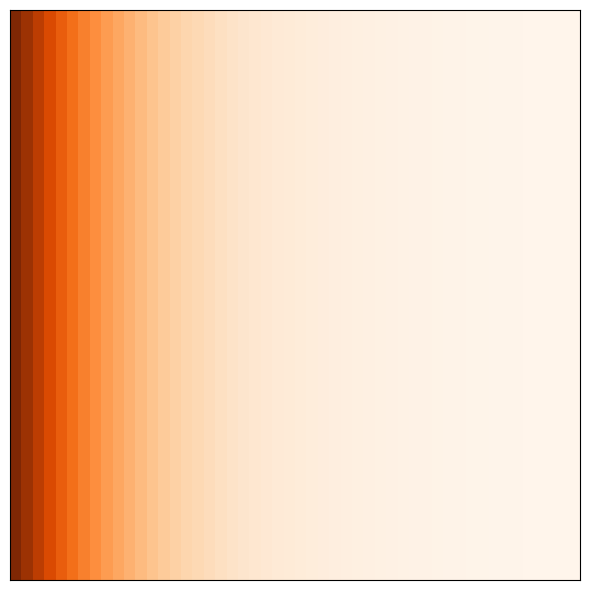

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define space
width, height = 50, 50

# Exponential decay along x
C0 = 1.0
lambda_decay = 0.1
x = np.arange(width)
gradient_1D = C0 * np.exp(-lambda_decay * x)

# Replicate 1D gradient along y-axis to make 2D field
gradient_2D = np.tile(gradient_1D, (height, 1))

# Plot using imshow
plt.figure(figsize=(6, 6))
plt.imshow(gradient_2D, cmap='Oranges', origin='lower', extent=[1, 50, 1, 50])

# Labels and styling
plt.xticks([])
plt.yticks([])


plt.tight_layout()
plt.show()


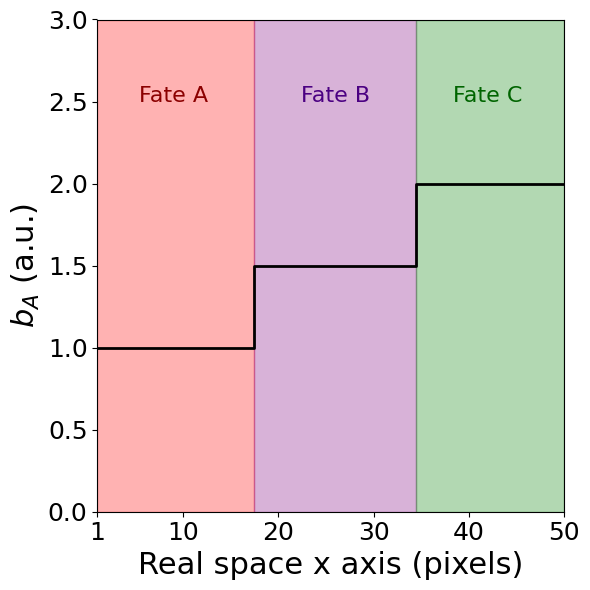

In [17]:


import numpy as np
import matplotlib.pyplot as plt

# Create matrix with 3 domains
matrix = np.zeros((50, 50), dtype=float)
matrix[:, :17] = 0      # Blue zone
matrix[:, 17:34] = 0.5  # White zone
matrix[:, 34:] = 1      # Red zone
FF_datas = matrix

# Use first row of matrix + shift for plotting
x = np.arange(1, 51)            # x from 1 to 50
y = FF_datas[0, :] + 1          # y values shifted up by 1 for visualization

# Plot
plt.figure(figsize=(6, 6))  # square figure
plt.step(x, y, where='mid', linewidth=2, color='black')  # step plot with vertical transitions

# Limits and tick marks
plt.xlim(1, 50)
plt.ylim(0, 3)
plt.xticks([1, 10, 20, 30, 40, 50], fontsize=18)
plt.yticks(fontsize=18)

# Colored regions (French flag style)
plt.axvspan(1, 17.5, color='red', alpha=0.3)
plt.axvspan(17.5, 34.5, color='purple', alpha=0.3)
plt.axvspan(34.5, 50, color='green', alpha=0.3)

plt.text(9, 2.5, 'Fate A', fontsize=16, ha='center', color='darkred')

plt.text(26, 2.5, 'Fate B', fontsize=16, ha='center', color='indigo')

plt.text(42, 2.5, 'Fate C', fontsize=16, ha='center', color='darkgreen')

plt.ylabel(r'$b_A$ (a.u.)', fontsize=22)
plt.xlabel(r'Real space x axis (pixels)', fontsize=22)

plt.tight_layout()
plt.show()



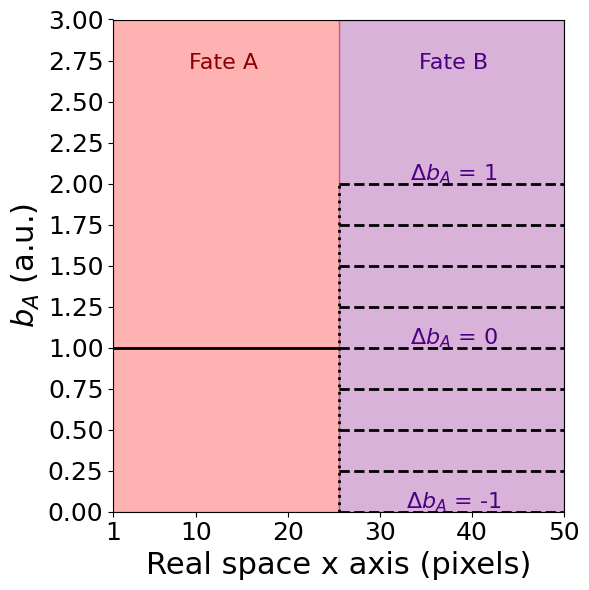

In [49]:
import numpy as np
import matplotlib.pyplot as plt

# Define x-axis
x = np.arange(1, 51)

# Fate A: constant at 1 from x = 1 to 25
fateA_x_start = 1
fateA_x_end = 25.5
fateA_y = 1

# Fate B: multiple horizontal levels from b_A = 0 to 2
fateB_levels = np.arange(0, 2.25, 0.25)
fateB_x_start = 25.5
fateB_x_end = 50

# Plot
plt.figure(figsize=(6, 6))

# Plot Fate A line
plt.hlines(y=fateA_y, xmin=fateA_x_start, xmax=fateA_x_end, colors='black', linewidth=2)

# Plot Fate B steps (start exactly at 25.5)
for level in fateB_levels:
    plt.hlines(y=level, xmin=fateB_x_start, xmax=fateB_x_end, colors='black', linewidth=2, linestyles='--')

# Vertical center boundary line
plt.axvline(25.5, ymin = 0,ymax = 0.6666666666, color='black', linewidth=2, linestyle=':')

# Shaded regions
plt.axvspan(fateA_x_start, 25.5, color='red', alpha=0.3)
plt.axvspan(25.5, fateB_x_end, color='purple', alpha=0.3)

# Labels
plt.text(13, 2.7, 'Fate A', fontsize=16, ha='center', color='darkred')
plt.text(38, 2.7, 'Fate B', fontsize=16, ha='center', color='indigo')
plt.text(38, 2.02, r'$\Delta b_{A}$ = 1', fontsize=16, ha='center', color='indigo')

plt.text(38, 1.02, r'$\Delta b_{A}$ = 0', fontsize=16, ha='center', color='indigo')
plt.text(38, 0.02, r'$\Delta b_{A}$ = -1', fontsize=16, ha='center', color='indigo')

# Axes setup
plt.xlim(1, 50)
plt.ylim(0, 3)
plt.xticks([1, 10, 20, 30, 40, 50], fontsize=18)
plt.yticks(np.arange(0, 3.25, 0.25), fontsize=18)

# Axis labels
plt.ylabel(r'$b_A$ (a.u.)', fontsize=22)
plt.xlabel(r'Real space x axis (pixels)', fontsize=22)

plt.tight_layout()
plt.show()




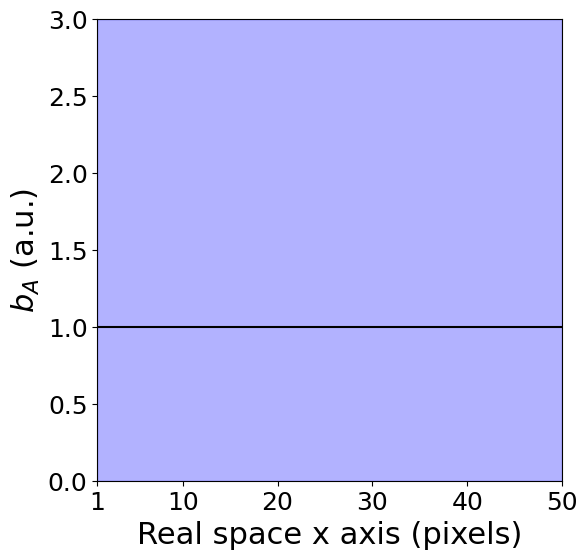

In [67]:
x = np.arange(1, 51)            # x from 1 to 50
y = FF_datas[0, :]*0 + 1          # your data
plt.figure(figsize=(6, 6))  # square figure

plt.plot(x, y, 'black')
plt.xlim(1, 50)
plt.ylim(0, 3)
plt.xticks([1, 10, 20, 30, 40, 50])  # custom x-tick marks

plt.axvspan(1, 50, color='blue', alpha=0.3)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.ylabel(r'$b_A$ (a.u.)',fontsize=22)
plt.xlabel(r'Real space x axis (pixels)',fontsize=22)

plt.show()

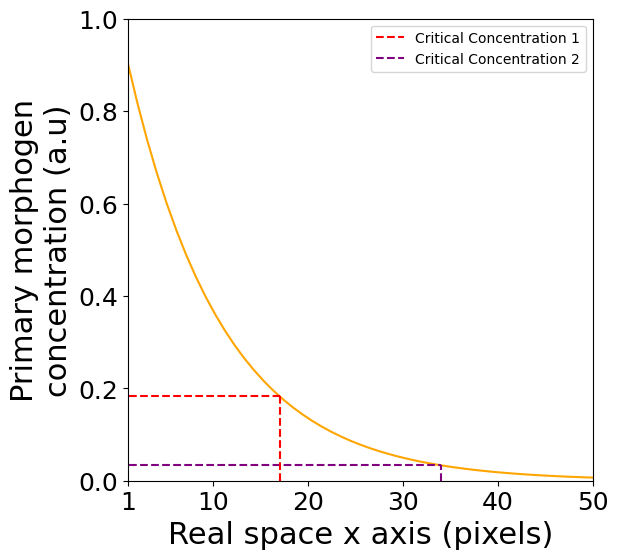

In [9]:
###### import numpy as np
import matplotlib.pyplot as plt

# Grid
length = 50
x = np.linspace(0, length, length)

# Exponential decay
C0 = 1.0
lambda_decay = 0.1
conc_blue = C0 * np.exp(-lambda_decay * x)

# Boundaries
boundary1 = 17
boundary2 = 34
C1 = C0 * np.exp(-lambda_decay * boundary1)
C2 = C0 * np.exp(-lambda_decay * boundary2)

# Plot morphogen curve
plt.figure(figsize=(6, 6))
plt.plot(x, conc_blue, color='orange')

# Plot horizontal lines from y=0 to curve (stop at curve)
plt.plot([0, boundary1], [C1, C1], 'r--', label=f'Critical Concentration 1')
plt.plot([0, boundary2], [C2, C2], color='purple', linestyle='--', label=f'Critical Concentration 2')

# Plot vertical lines from curve to x-axis
plt.vlines(boundary1, 0, C1, color='red', linestyles='--')
plt.vlines(boundary2, 0, C2, color='purple', linestyles='--')

# Labels
plt.xlabel('Real space x axis (pixels)', fontsize = 22)
plt.ylabel(r'Primary morphogen'+ '\n' +'concentration (a.u)', fontsize =22)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.xticks([1, 10, 20, 30, 40, 50])
plt.ylim(0,1)
plt.xlim(1,50)
plt.legend()
plt.show()



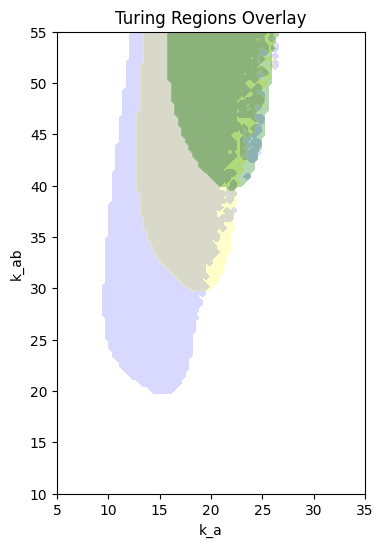

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, diff
import sympy as sp

# Your compute_turing_region and solve_ss function should be defined above this block

fig, ax = plt.subplots(figsize=(10, 6))

# Define colormaps or fixed colors for each region
colors = {
    "base": "blue",
    "bA+0.5": "yellow",
    "bA+1": "green"
}

# Base params
base_params = [
    1,       # D_A
    25,      # D_B
    3500,    # V_A
    3500,    # V_B
    0.5,     # k_BA
    1,       # b_A
    1,       # b_B
    6,       # μ_A
    8        # μ_B
]

# Plot for base case
X, Y, Turing_region = compute_turing_region(base_params, 5, 35, 10, 55, 3)
ax.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white", colors["base"]], alpha=0.3)

# Plot for b_A + 0.5
params_bA_plus_05 = base_params.copy()
params_bA_plus_05[5] += 0.5
X, Y, Turing_region1 = compute_turing_region(params_bA_plus_05, 5, 35, 10, 55, 3)
ax.contourf(X, Y, Turing_region1, levels=[-np.inf, 0, np.inf], colors=["white", colors["bA+0.5"]], alpha=0.3)

# Plot for b_A + 1
params_bA_plus_1 = base_params.copy()
params_bA_plus_1[5] += 1
X, Y, Turing_region2 = compute_turing_region(params_bA_plus_1, 5, 35, 10, 55, 3)
ax.contourf(X, Y, Turing_region2, levels=[-np.inf, 0, np.inf], colors=["white", colors["bA+1"]], alpha=0.3)

# Set labels and title
ax.set_xlabel("k_a")
ax.set_ylabel("k_ab")
ax.set_title("Turing Regions Overlay")

# Optional: Add a custom legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=colors["base"], label='b_A = 1'),
    Patch(facecolor=colors["bA+0.5"], label='b_A = 1.5'),
    Patch(facecolor=colors["bA+1"], label='b_A = 2')
]

ax.set_aspect('equal')

plt.show()


NameError: name 'X' is not defined

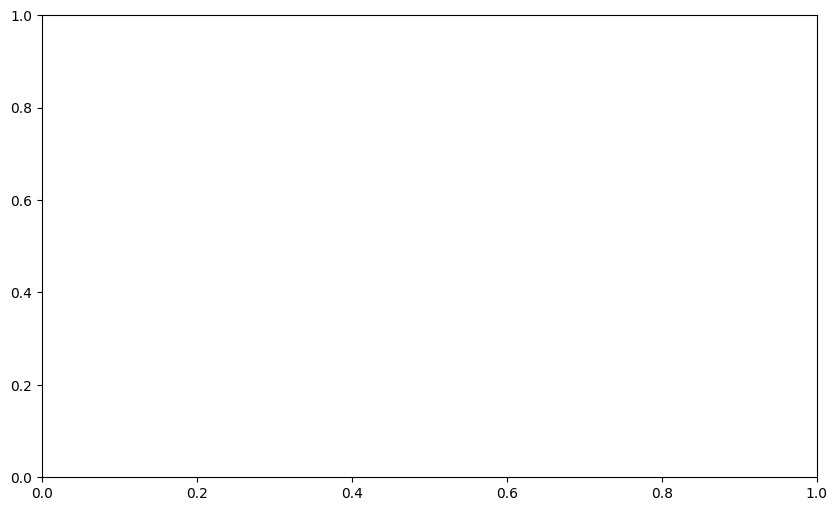

In [4]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white", colors["base"]], alpha=1)
ax.contourf(X, Y, Turing_region1, levels=[-np.inf, 0, np.inf], colors=["white", "orange"], alpha=0.3)
ax.contourf(X, Y, Turing_region2, levels=[-np.inf, 0, np.inf], colors=["white", colors["bA+1"]], alpha=0.5)
from matplotlib.patches import Circle

circles = [
    (18.35, 30, 5),
    (21.94, 46.73, 5),
    (15.51, 45.81, 5),
    #(23.86, 37.55,5)
]


# [Insert your Turing plotting code here as in previous example]

# ASCII value of 'C' is 67
for i, (x_center, y_center, radius) in enumerate(circles):
    label = f"{chr(67 + i)})"  # Converts 0 -> 'C)', 1 -> 'D)', etc.
    circle = Circle((x_center, y_center), radius, color='black', fill=False, linewidth=1)
    ax.add_patch(circle)
    ax.text(x_center, y_center, label, color='black', fontsize=10, fontweight='bold',
            ha='center', va='center', bbox=dict(facecolor='None', edgecolor='none', alpha=0.7))


# Labels, title, and legend
ax.set_xlabel("k_a")
ax.set_ylabel("k_ab")
ax.set_xlim(5, 35)
ax.set_ylim(10, 55)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax.set_aspect('equal')

In [110]:
print(params[5])

1


In [90]:
def simulate_two_step_euler_maruyama_with_storage(
    y0, t0, t_max, dt, c, dx, bound_cond, modelfuns, r,
    noise_amp, v_r, v_theta, cent_cyc, k1_0, k2_0,tangential_noise, radial_noise, FF_data
):
    def apply_boundary(u):
        if bound_cond == 'Neumann':
            u[:, 0] = u[:, 1]
            u[:, -1] = u[:, -2]
            u[0, :] = u[1, :]
            u[-1, :] = u[-2, :]
        elif bound_cond == 'Absorbing':
            u[:, 0] = 0
            u[:, -1] = 0
            u[0, :] = 0
            u[-1, :] = 0
        return u

    def laplacian(u):
        u = apply_boundary(u)
        return (
            -4 * u +
            np.roll(u, 1, axis=0) + np.roll(u, -1, axis=0) +
            np.roll(u, 1, axis=1) + np.roll(u, -1, axis=1)
        ) / dx**2
    
    b_a, v_a, k_a,a_conc,b_conc, k_ba, mu_a = symbols('b_a v_a k_a a_conc b_conc k_ba mu_a', real=True)
    r_d_a = b_a + v_a * 1 / (1 + (k_a / a_conc) ** 2) * 1 / (1 + (b_conc / k_ba) ** 2) - mu_a * a_conc
    b_b, v_b, k_ab,a_conc,b_conc, mu_b = symbols('b_b v_b k_ab a_conc b_conc mu_b', real=True)
    r_d_b = b_b + v_b * 1 / (1 + (k_ab / a_conc) ** 2) - mu_b * b_conc
    r_d_a_a = diff(r_d_a, a_conc)
    r_d_a_b = diff(r_d_a, b_conc)
    r_d_b_b = diff(r_d_b, b_conc)
    r_d_b_a = diff(r_d_b, a_conc)
    # Setup initial conditions
    n = int(np.sqrt(len(y0[:-2]) // 2))  # infer grid size
    params = c
    mod_pars = params[2:]
    a = np.reshape(np.zeros(n*n) + solve_ss(k1_0,k2_0,params)[0],(n,n))
    b = np.reshape(np.zeros(n*n) + solve_ss(k1_0,k2_0,params)[1],(n,n)) 
    k1 = k1_0
    k2 = k2_0
    t = t0
    Da = params[0]
    Db = params[1]
    values_base = { v_a: mod_pars[0], k_ba: mod_pars[2], mu_a: mod_pars[5],
        b_b: mod_pars[4], v_b: mod_pars[1], mu_b: mod_pars[6] # Fixed values
    }
    k_values = np.linspace(0, 2, 100)
    results = []  # List to store time, concentrations, and rate constants
    n = 0
    while t < t_max:
        a = apply_boundary(a)
        b = apply_boundary(b) # A compromise as the compution time is too long if we check turing every dt. so we check evert 1 t.
        # if int(n % (1/dt)) == 0:
        #     unique_regions = np.unique(FF_data)
        #     FF_trig = 0  # default to off
        #     for region_val in unique_regions:
        #         values = values_base.copy()
        #         params2 = params
        #         params2[5] = mod_pars[3] + region_val
        #         # Boost b_a for this region
        #         values[k_a] = k1
        #         values[k_ab] = k2
        #         values[a_conc] = solve_ss(k1, k2, params)[0]
        #         values[b_conc] = solve_ss(k1, k2, params)[1]

        #         # Boost region's b_a using FF_data value (e.g., +1, +2, etc.)
        #         values[b_a] = mod_pars[3] + region_val

        #         J = np.array([
        #             [r_d_a_a.subs(values).evalf(), r_d_a_b.subs(values).evalf()],
        #             [r_d_b_a.subs(values).evalf(), r_d_b_b.subs(values).evalf()]
        #         ], dtype=float)

        #         real_lambda = []
        #         for k in k_values:
        #             J_diff = J - np.diag([Da * k**2, Db * k**2])
        #             eig_vals = np.real(np.linalg.eigvals(J_diff))
        #             max_real_lambda = np.max(eig_vals)
        #             real_lambda.append(max_real_lambda)

        #         if np.max(real_lambda) > -0.1:
        #             FF_trig = 1
        #             break 
        FF_trig = 1
        # Compute reaction terms for current concentrations
        if FF_trig:
            b_a_spatial = mod_pars[3] + FF_data
        else:
            b_a_spatial = None

        f1_now, f2_now = modelfuns[0](a, b, mod_pars, k1, k2, b_a_spatial)

        g1_now, g2_now = modelfuns[1](k1, k2, r, v_r, v_theta, cent_cyc,tangential_noise, radial_noise)

        Da = params[0]
        Db = params[1]

        lap_a = laplacian(a)
        lap_b = laplacian(b)

        # First Euler-Maruyama step (predict)
        dydt_a = Da * lap_a + f1_now 
        dydt_b = Db * lap_b + f2_now 

        # Predict concentrations (Euler step)
        a_pred = a + dt * dydt_a
        b_pred = b + dt * dydt_b

        k1_pred = k1 + dt * g1_now
        k2_pred = k2 + dt * g2_now

        # Get the predicted reaction terms for the predicted concentrations
        f1_pred, f2_pred = modelfuns[0](a_pred, b_pred, mod_pars, k1_pred, k2_pred, b_a_spatial)
        g1_pred, g2_pred = modelfuns[1](k1_pred, k2_pred, r, v_r, v_theta, cent_cyc,tangential_noise, radial_noise)

        # Second Euler-Maruyama step (corrected)
        lap_a_pred = laplacian(a_pred)
        lap_b_pred = laplacian(b_pred)

        dydt_a_pred = Da * lap_a_pred + f1_pred 
        dydt_b_pred = Db * lap_b_pred + f2_pred

        # Combine the two steps (Heun-like method)
        noise_a = a*(noise_amp * np.sqrt(dt) * np.random.randn(*a.shape))
        noise_b = b*(noise_amp * np.sqrt(dt) * np.random.randn(*b.shape))

        # Final update step using both predicted and current steps
        a += 0.5 * dt * (dydt_a + dydt_a_pred) + noise_a
        b += 0.5 * dt * (dydt_b + dydt_b_pred) + noise_b

        # Prevent negative or NaN values
        if np.any(a < 0):
            print("Warning: 'a' contains negative values:", a[a < 0])
        if np.any(b < 0):
            print("Warning: 'b' contains negative values:", b[b < 0])
        a = np.nan_to_num(a, nan=0.0, posinf=1e10, neginf=0.0)
        b = np.nan_to_num(b, nan=0.0, posinf=1e10, neginf=0.0)
        

        a = np.clip(a, 1e-10, None)  # Enforces a minimum of 0
        b = np.clip(b, 1e-10, None)

        
        # Compute the rate of change of k1 and k2 (using the limit cycle dynamics)
        k1 += 0.5 * dt * (g1_now + g1_pred)
        k2 += 0.5 * dt * (g2_now + g2_pred)
        # Store time, concentration, and parameters at each time step
        if int(n%(1/dt)) == 0.0: 
            results.append({
                't': t,   # Current time
                'u': a.copy(),  # Concentration of A (u)
                'v': b.copy(),  # Concentration of B (v)
                'k1': k1,  # Reaction rate constant k1
                'k2': k2   # Reaction rate constant k2
            })
        n += 1
        t += dt


    return results


In [94]:

def soft_clip(x, floor=1e-10):
    return np.where(x < floor, floor, x)


# def Net8_pat(a, b, mod_pars, k1, k2): # Reaction terms
#     v_a, v_b, k_ba, b_a, b_b, mu_a, mu_b = mod_pars
#     k_a, k_ab = k1, k2
#     f1 = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
#     f2 = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b

#     return f1, f2

def Net8_pat(a, b, mod_pars, k1, k2, b_a_spatial=None):
    v_a, v_b, k_ba, b_a_default, b_b, mu_a, mu_b = mod_pars
    k_a, k_ab = k1, k2

    a_safe = np.clip(a, 1e-8, None)
    b_safe = np.clip(b, 1e-8, None)

    # Use spatially varying b_a if provided
    b_a_used = b_a_spatial if b_a_spatial is not None else b_a_default

    f1 = b_a_used + v_a * (1 / (1 + (k_a / a_safe) ** 2)) * (1 / (1 + (b_safe / k_ba) ** 2)) - mu_a * a
    f2 = b_b + v_b * (1 / (1 + (k_ab / a_safe) ** 2)) - mu_b * b

    return f1, f2




def Net8_cycle(k1, k2, radius, speed_r, speed_theta, cent_cyc, tangential_noise, radial_noise):
    # Center coordinates
    k1star, k2star = cent_cyc
    x = k1 - k1star
    y = k2 - k2star
    r = np.sqrt(x**2 + y**2)

    # Core deterministic dynamics
    lin1 = x * (speed_r * (radius - r))
    lin2 = y * (speed_r * (radius - r))
    an1 = y * speed_theta
    an2 = x * speed_theta

    # Unit radial and tangential vectors
    if r == 0:
        unit_r = [1.0, 0.0]
        unit_t = [0.0, 1.0]
    else:
        unit_r = [x / r, y / r]
        unit_t = [-y / r, x / r]

    # Add radial noise (in/out movement)
    rad_noise = np.random.normal(0, radial_noise)
    rad_x = rad_noise * unit_r[0]
    rad_y = rad_noise * unit_r[1]

    # Add tangential noise (spin variation)
    tang_noise = np.random.normal(0, tangential_noise)
    tang_x = tang_noise * unit_t[0]
    tang_y = tang_noise * unit_t[1]

    # Final dynamics
    f1 = lin1 - an1 + rad_x + tang_x
    f2 = lin2 + an2 + rad_y + tang_y

    return f1, f2


def solve_ss(k1, k2, params):

    # Define symbolic variables
    a, b = sp.symbols('a b', real=True)
    b_a, v_a, k_a, k_ba, mu_a = sp.symbols('b_a v_a k_a k_ba mu_a', real=True)
    b_b, v_b, k_ab, mu_b = sp.symbols('b_b v_b k_ab mu_b', real=True)

    # Define steady-state equations
    r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
    r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
    # Assign values to variables
    mod_pars = params[2:]
    values = {
        b_a: mod_pars[3], v_a: mod_pars[0], k_ba: mod_pars[2], mu_a: mod_pars[5],
        b_b: mod_pars[4], v_b: mod_pars[1], mu_b: mod_pars[6],k_a: k1,k_ab: k2,
    }

    # Convert symbolic expressions into numerical functions
    r_d_a_num = sp.lambdify((a, b), r_d_a.subs(values), 'numpy')
    r_d_b_num = sp.lambdify((a, b), r_d_b.subs(values), 'numpy')

    # Define system of equations
    def equations(vars):
        a, b = vars
        return np.array([r_d_a_num(a, b), r_d_b_num(a, b)])

    # Try multiple solvers for robustness
    initial_guesses = [[4, 2], [1, 1], [10, 5], [0.1, 0.1]]
    solvers = ['hybr', 'lm', 'broyden1', 'df-sane']
    
    for guess in initial_guesses:
        for method in solvers:
            result = root(equations, guess, method=method)
            if result.success:
                return result.x  # Return solution if successful

    raise RuntimeError("No solution found with tested solvers and initial guesses.")

array([10., 10., 10., ..., 10., 10., 10.])

In [4]:

r, v_r, v_theta = 5, 0.1, 0.01 # 8, 0.3, 0.006

bound_cond = "Neumann"
nx = 50
ny = 50

model_eq = [Net8_pat, Net8_cycle] 

# Set parameters for Turing
# params = [
#     1,
#     1000, 
#     1000, # v_a, 
#     1000,# v_b, 
#     0.464158883361278,# k_ba, 
#     0.0100000000000000,#  b_a, 
#     0.0100000000000000,# b_b, 
#     0.464158883361278,# mu_a, 
#     21.5443469003188,# mu_b
# ]
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 
mod_pars = params[2:]
dx = 1
factor = 1 

y0 = np.zeros(2 * nx * ny + 2)

# Set initial values for cycle
#If you want to start with the initial condition of another simulation
# solb = np.load(f"C:/Users/seyoo/Downloads/solb_centre19_19_30min_V1.npz")
# solbt = solb['t']
# solby = solb['y']



# solb = None
# solby = None
# solbt = None

In [109]:
# from joblib import Parallel, delayed
dt = 0.002
noise_amp = 0.01
# 21.285108735154093, 34.047855816703716 [18.35,30]
# 10.861321652191398  43.975703767188854 center (15.51, 45.82)
# 25.12589545894753 50.58726009142997 center (21.94, 46.73)
# entries 23.79404943007148 42.46245666180671 center (np.float64(22.857142857142858), np.float64(37.55102040816327))

cent_cycs = [[21.94, 46.73]]*8
k1s = [25.12589545894753]*8
k2s = [50.58726009142997]*8
t_max = 630
v_theta = 0.01
print(FF_datas)
param_tris = list(zip(cent_cycs, k1s,k2s))
# Step 2: Create the simulation wrapper that accepts both
def run_simulation_combo(cent_cycs, k1s,k2s):
    return simulate_two_step_euler_maruyama_with_storage(
        y0=y0.copy(),
        t0=0,
        t_max=t_max,
        dt=dt,
        c=params,
        dx=dx,
        bound_cond=bound_cond,
        modelfuns=model_eq,
        r=r,
        noise_amp=noise_amp,
        v_r=v_r,
        v_theta=v_theta,
        cent_cyc=cent_cycs,
        k1_0 = k1s,
        k2_0 = k2s,
        tangential_noise = 0, 
        radial_noise = 0,
        FF_data = FF_datas*0
)


# Step 3: Run them in parallel
results_all = Parallel(n_jobs=8)(
    delayed(run_simulation_combo)(cent_cycs, k1s,k2s) for cent_cycs, k1s,k2s in param_tris
)
# Now `results` contains the concentration fields at each time step

#12:45
#takes 20 min for 3600 if not running parallel

[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [110]:
for i in range(len(param_tris)):
    results = results_all[i]
    print(i)
    k1_values = [res['k1'] for res in results]
    k2_values = [res['k2'] for res in results]
    u_values = [res['u'] for res in results]
    v_values = [res['v'] for res in results]
    t_values = [res['t'] for res in results]
    np.savez(f"noFF_redone_{t_max}_noise_amp{noise_amp}_v_theta{v_theta}_{first_mat}_{second_mat}_{third_mat}_cent_cyc{cent_cycs[i][0],cent_cycs[i][1]}_{i}.npz", k1 = k1_values, k2 = k2_values, u = u_values, v = v_values, t = t_values)

0
1
2
3
4
5
6
7


In [13]:
b_a, v_a, k_a,a,b, k_ba, mu_a = symbols('b_a v_a k_a a b k_ba mu_a', real=True)
r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
b_b, v_b, k_ab,a,b, mu_b = symbols('b_b v_b k_ab a b mu_b', real=True)
r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
r_d_a_a = diff(r_d_a, a)
r_d_a_b = diff(r_d_a, b)
r_d_b_b = diff(r_d_b, b)
r_d_b_a = diff(r_d_b, a)
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 

D_a = params[0]
D_b = params[1] 
turing_enter = []
turing_leave = []
sharp_dec = []
lambda_max = []
for index in range(0,len(res['k1'])):
    values = {
        b_a: mod_pars[3],
        v_a: mod_pars[0],
        k_a: res['k1'][index],
        a: solve_ss(res['k1'][index],res['k2'][index],params)[0], 
        b: solve_ss(res['k1'][index],res['k2'][index],params)[1], 
        k_ba: mod_pars[2],
        mu_a: mod_pars[5],
        b_b: mod_pars[4],
        v_b: mod_pars[1],
        k_ab: res['k2'][index],
        mu_b: mod_pars[6]
    }
    rdaa_numeric = r_d_a_a.subs(values).evalf()
    rdab_numeric = r_d_a_b.subs(values).evalf()
    rdba_numeric = r_d_b_a.subs(values).evalf()
    rdbb_numeric = r_d_b_b.subs(values).evalf()

    J = np.array([[rdaa_numeric,rdab_numeric], [rdba_numeric, rdbb_numeric]])
    J = np.array(J, dtype=float)
    eig_val = np.linalg.eig(J)[0]
    D_a = params[0]
    D_b = params[1] 
    k_values = np.linspace(0, 2, 200)
    real_lambda = []
    prev_eig_vals = [None, None]
    for k in k_values:
        J_diff = J - np.diag([D_a * k**2, D_b * k**2])
        eig_vals = np.real(np.linalg.eigvals(J_diff))
        max_real_lambda = np.max(eig_vals)
        real_lambda.append(max_real_lambda)
        
        
    lambda_max.append(max(real_lambda))
    if lambda_max[index] >= 0 and lambda_max[index - 1] <0:
        print('Eigenvalues became positive at:',index)
        turing_enter.append(index)
    elif lambda_max[index] < 0 and lambda_max[index - 1] >= 0:
        print('Eigenvalues became negative at:', index)
        turing_leave.append(index)
sharp_dec = np.unique(sharp_dec)

Eigenvalues became negative at: 85
Eigenvalues became positive at: 618


In [114]:
res_concs_sum = np.reshape(np.zeros(2500),(50,50))*631
res_dict = {i: [] for i in range(0,8)}
for i in range(0,8):
    res = np.load(f"FF_redone_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(21.94, 46.73)_{i}.npz")
    res_dict[i].append(res)
    res_concs_sum = np.add(res_concs_sum, res['u'])
res_concs_mean = res_concs_sum/8
mean_res_concs_sd_1 = []
mean_res_concs_sd_2 = []
mean_res_concs_sd_3 = []
avg_res_sd1 = []
avg_res_sd2 = []
avg_res_sd3 = []
for i in range(0,len(res['k1'])):
    temp_mat = []
    for j in range(0,8):
        temp_mat.append(res_dict[j][0]['u'][i])
    stacked = np.stack(temp_mat, axis=0)  # Shape will be (3, 50, 50)
    mean_res_concs_sd_1.append(np.std(stacked[:, :, :17], axis=0))
    mean_res_concs_sd_2.append(np.std(stacked[:, :, 17:34], axis=0))
    mean_res_concs_sd_3.append(np.std(stacked[:, :, 34:], axis=0))
    
    avg_res_sd1.append(np.mean(np.std(stacked[:, :, :17], axis=0)))
    avg_res_sd2.append(np.mean(np.std(stacked[:, :, 17:34], axis=0)))
    avg_res_sd3.append(np.mean(np.std(stacked[:, :, 34:], axis=0)))



mean_res_concs_msd_1 = []
mean_res_concs_msd_2 = []
mean_res_concs_msd_3 = []

avg_res_msd1 = []
avg_res_msd2 = []
avg_res_msd3 = []

for i in range(0, len(res['k1'])):
    temp_mat = []
    for j in range(0, 8):
        temp_mat.append(res_dict[j][0]['u'][i])
    stacked = np.stack(temp_mat, axis=0)  # Shape: (8, 50, 50)

    mean_stack = np.mean(stacked, axis=0)
    squared_deviation = (stacked - mean_stack) ** 2

    msd_1 = np.mean(squared_deviation[:, :, :17], axis=0)
    msd_2 = np.mean(squared_deviation[:, :, 17:34], axis=0)
    msd_3 = np.mean(squared_deviation[:, :, 34:], axis=0)

    mean_res_concs_msd_1.append(msd_1)
    mean_res_concs_msd_2.append(msd_2)
    mean_res_concs_msd_3.append(msd_3)

    avg_res_msd1.append(np.mean(msd_1))
    avg_res_msd2.append(np.mean(msd_2))
    avg_res_msd3.append(np.mean(msd_3))


    

    

In [115]:
nres_concs_sum = np.reshape(np.zeros(2500),(50,50))*631
nres_dict = {i: [] for i in range(0,8)}

for i in range(0,8):
    nres = np.load(f"noFF_redone_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(21.94, 46.73)_{i}.npz")
    
    nres_dict[i].append(nres)
    nres_concs_sum = np.add(nres_concs_sum, nres['u'])
nres_concs_mean = nres_concs_sum/8
nmean_res_concs_sd_1 = []
navg_res_sd1 = []
for i in range(0,len(nres['k1'])):
    ntemp_mat = []
    for j in range(0,8):
        ntemp_mat.append(nres_dict[j][0]['u'][i])
    nstacked = np.stack(ntemp_mat, axis=0)  # Shape will be (3, 50, 50)
    nmean_res_concs_sd_1.append(np.std(nstacked, axis=0))
    
    navg_res_sd1.append(np.mean(np.std(nstacked[:, :, :], axis=0)))


nmean_res_concs_msd_1 = []

navg_res_msd1 = []
for i in range(0, len(nres['k1'])):
    ntemp_mat = []
    for j in range(0, 8):
        ntemp_mat.append(nres_dict[j][0]['u'][i])
    nstacked = np.stack(ntemp_mat, axis=0)  # Shape: (8, 50, 50)

    nmean_stack = np.mean(nstacked, axis=0)
    nsquared_deviation = (nstacked - nmean_stack) ** 2

    nmsd_1 = np.mean(nsquared_deviation, axis=0)

    nmean_res_concs_msd_1.append(nmsd_1)

    navg_res_msd1.append(np.mean(nmsd_1))



28.513571493897604


In [ ]:
# x = np.linspace(0,630,631)
# top = 2
# bottom =0
# #- means entrance to TI and : means exit
# plt.plot(navg_res_msd1,'blue')
# plt.plot(avg_res_msd1,'red')
# plt.axvline(30,color = 'red', linestyle='-') #20- , 8-, 10-, 30-
# plt.axvline(232,color = 'red', linestyle=':') #372:, 522:, 393:, 232: 

# plt.plot(avg_res_msd2,'yellow')
# plt.axvline(19,color = 'yellow', linestyle='-') #144:, 67- , 17-,19-
# plt.axvline(263,color = 'yellow', linestyle=':') # 621-, 480:, 403:,263: 

# plt.plot(avg_res_msd3,'green')
# plt.axvline(85,color = 'green', linestyle=':') # None, 194-,  240: 85:
# plt.axvline(618,color = 'green', linestyle='-') #None, 423:,  290-, 618-
# #plt.axvline(431,color = 'green', linestyle=':') # None, None, 431:, None
# #plt.axvline(616,color = 'green', linestyle='-') #None, None, 616-, None
# plt.xlim(0,630)
# plt.ylim(bottom, top)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00')])

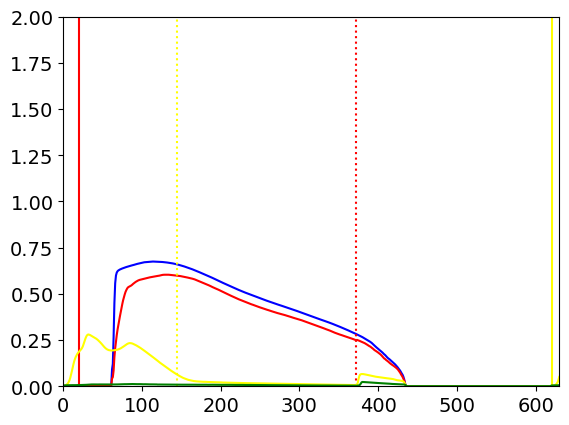

In [98]:
x = np.linspace(0,630,631)
top = 2
bottom =0
#- means entrance to TI and : means exit
plt.plot(navg_res_sd1,'blue')
plt.plot(avg_res_sd1,'red')
plt.axvline(20,color = 'red', linestyle='-') #20- , 8-, 10-, 30-
plt.axvline(372,color = 'red', linestyle=':') #372:, 522:, 393:, 232: 

plt.plot(avg_res_sd2,'yellow')
plt.axvline(144,color = 'yellow', linestyle=':') #144:, 67- , 17-,19-
plt.axvline(621,color = 'yellow', linestyle='-') # 621-, 480:, 403:,263: 

plt.plot(avg_res_sd3,'green')
#plt.axvline(85,color = 'green', linestyle=':') # None, 194-,  240: 85:
#plt.axvline(618,color = 'green', linestyle='-') #None, 423:,  290-, 618-
#plt.axvline(431,color = 'green', linestyle=':') # None, None, 431:, None
#plt.axvline(616,color = 'green', linestyle='-') #None, None, 616-, None
plt.xlim(0,630)
plt.ylim(bottom, top)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00')])

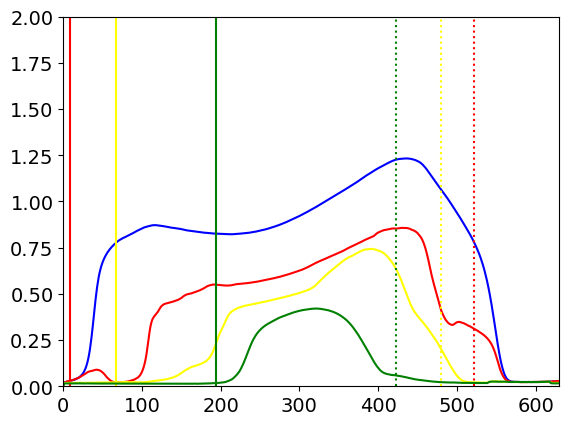

In [106]:
x = np.linspace(0,630,631)
top = 2
bottom =0
#- means entrance to TI and : means exit
plt.plot(navg_res_sd1,'blue')
plt.plot(avg_res_sd1,'red')
plt.axvline(8,color = 'red', linestyle='-') #20- , 8-, 10-, 30-
plt.axvline(522,color = 'red', linestyle=':') #372:, 522:, 393:, 232: 

plt.plot(avg_res_sd2,'yellow')
plt.axvline(67,color = 'yellow', linestyle='-') #144:, 67- , 17-,19-
plt.axvline(480,color = 'yellow', linestyle=':') # 621-, 480:, 403:,263: 

plt.plot(avg_res_sd3,'green')
plt.axvline(194,color = 'green', linestyle='-') # None, 194-,  240: 85:
plt.axvline(423,color = 'green', linestyle=':') #None, 423:,  290-, 618-
#plt.axvline(431,color = 'green', linestyle=':') # None, None, 431:, None
#plt.axvline(616,color = 'green', linestyle='-') #None, None, 616-, None
plt.xlim(0,630)
plt.ylim(bottom, top)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(0.0, 2.0)

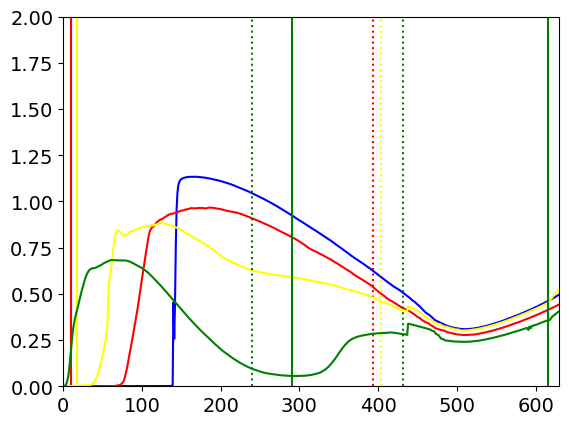

In [117]:
x = np.linspace(0,630,631)
top = 2
bottom =0
#- means entrance to TI and : means exit
plt.plot(navg_res_sd1,'blue')
plt.plot(avg_res_sd1,'red')
plt.axvline(10,color = 'red', linestyle='-') #20- , 8-, 10-, 30-
plt.axvline(393,color = 'red', linestyle=':') #372:, 522:, 393:, 232: 

plt.plot(avg_res_sd2,'yellow')
plt.axvline(17,color = 'yellow', linestyle='-') #144:, 67- , 17-,19-
plt.axvline(403,color = 'yellow', linestyle=':') # 621-, 480:, 403:,263: 

plt.plot(avg_res_sd3,'green')
plt.axvline(240,color = 'green', linestyle=':') # None, 194-,  240: 85:
plt.axvline(290,color = 'green', linestyle='-') #None, 423:,  290-, 618-
plt.axvline(431,color = 'green', linestyle=':') # None, None, 431:, None
plt.axvline(616,color = 'green', linestyle='-') #None, None, 616-, None
plt.xlim(0,630)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(bottom, top)

In [34]:
# ind = 100
# plt.imshow(res_concs_mean[ind])
# fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 cols

# # Plot images on the axes
# axes[0, 0].imshow(res_concs_mean[ind][:, :16])
# axes[0, 0].set_title("res1[:, :16]")
# axes[0, 0].axis('off')

# axes[0, 1].imshow(res_concs_mean[ind][:, :16])
# axes[0, 1].set_title("res2[:, :16]")
# axes[0, 1].axis('off')

# axes[0, 2].imshow(res_concs_mean[ind][:, 17:33])
# axes[0, 2].set_title("res1[:, 17:33]")
# axes[0, 2].axis('off')

# axes[1, 0].imshow(res_concs_mean[ind][:, 17:33])
# axes[1, 0].set_title("res2[:, 17:33]")
# axes[1, 0].axis('off')

# axes[1, 1].imshow(res_concs_mean[ind][:, 34:])
# axes[1, 1].set_title("res1[:, 34:]")
# axes[1, 1].axis('off')

# axes[1, 2].imshow(res_concs_mean[ind][:, 34:])
# axes[1, 2].set_title("res2[:, 34:]")
# axes[1, 2].axis('off')

# plt.tight_layout()
# plt.show()

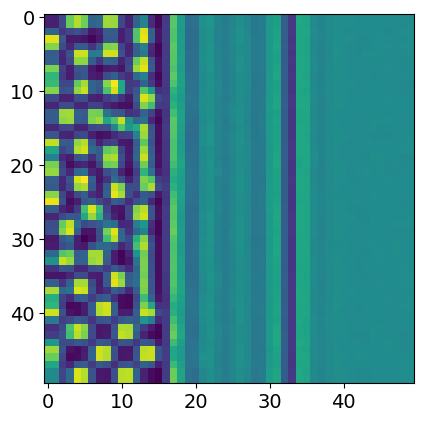

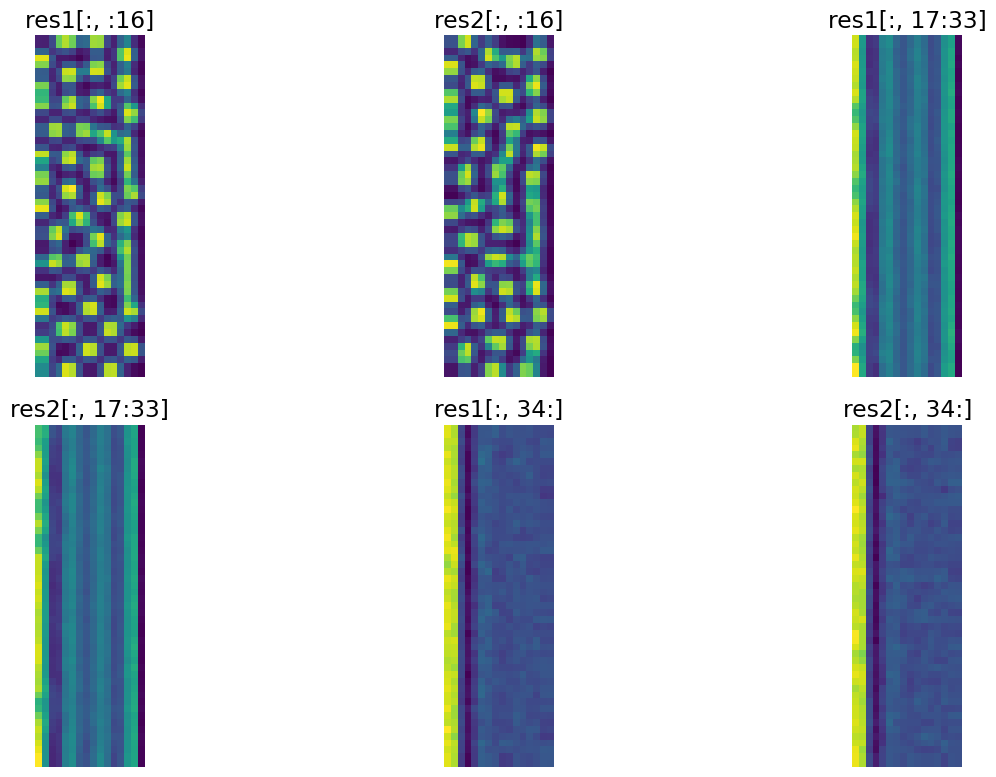

In [34]:
ind = 230
res1 = np.load(f"FF_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(18.35, 30)_3.npz")
res2 = np.load(f"FF_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(18.35, 30)_2.npz")
plt.imshow(res1['u'][ind])
fig, axes = plt.subplots(2, 3, figsize=(15, 8))  # 2 rows, 3 cols

# Plot images on the axes
axes[0, 0].imshow(res1['u'][ind][:, :16])
axes[0, 0].set_title("res1[:, :16]")
axes[0, 0].axis('off')

axes[0, 1].imshow(res2['u'][ind][:, :16])
axes[0, 1].set_title("res2[:, :16]")
axes[0, 1].axis('off')

axes[0, 2].imshow(res1['u'][ind][:, 17:33])
axes[0, 2].set_title("res1[:, 17:33]")
axes[0, 2].axis('off')

axes[1, 0].imshow(res2['u'][ind][:, 17:33])
axes[1, 0].set_title("res2[:, 17:33]")
axes[1, 0].axis('off')

axes[1, 1].imshow(res1['u'][ind][:, 34:])
axes[1, 1].set_title("res1[:, 34:]")
axes[1, 1].axis('off')

axes[1, 2].imshow(res2['u'][ind][:, 34:])
axes[1, 2].set_title("res2[:, 34:]")
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()


(22.0, 38.0)

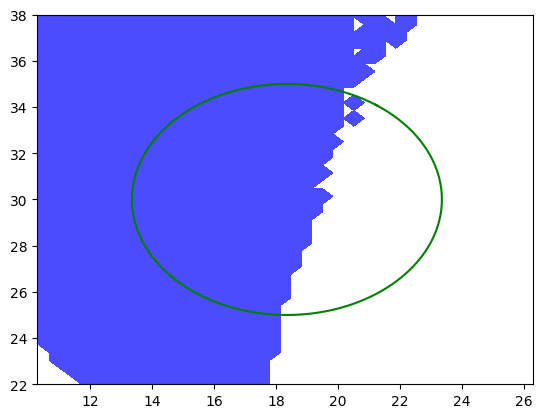

In [9]:

plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white","blue"], alpha=0.7)
plt.plot(res1['k1'],res1['k2'],'green')
plt.xlim(10.3,26.3)
plt.ylim(22,38)

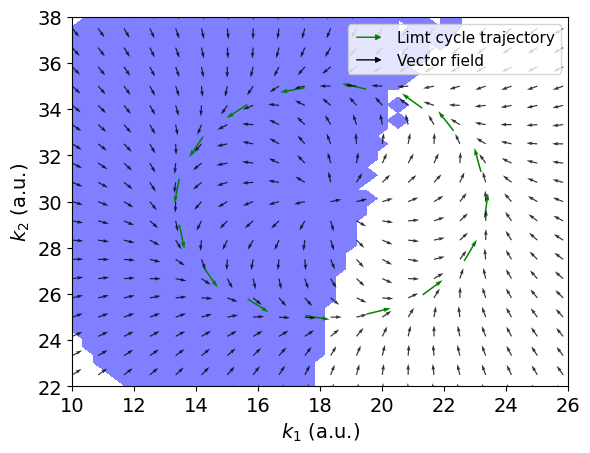

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define your parameter ranges
k1_vals = np.linspace(10, 30, 25)
k2_vals = np.linspace(20, 40, 25)
from matplotlib.lines import Line2D


# Create proxy arrows for legend

# Initialize arrays for vector field components
F1 = np.zeros((len(k2_vals), len(k1_vals)))  # Shape: (rows=k2, cols=k1)
F2 = np.zeros((len(k2_vals), len(k1_vals)))
mpl.rcParams['font.size'] = 14
# Compute vector field via for loops
for i, k2 in enumerate(k2_vals):
    for j, k1 in enumerate(k1_vals):
        f1, f2 = Net8_cycle(
            k1, k2,
            radius=5,
            speed_r=0.01,
            speed_theta=0.01,
            cent_cyc=(18.3, 30),
            tangential_noise=0,
            radial_noise=0
        )
        mag = np.sqrt(f1**2 + f2**2) + 1e-9  # avoid divide by zero
        F1[i, j] = f1 / mag
        F2[i, j] = f2 / mag

# Reconstruct coordinate grid for plotting
K1, K2 = np.meshgrid(k1_vals, k2_vals)  # only for visualization

# Extract trajectory (adjust indexing as needed)
k1_traj = res1['k1']
k2_traj = res1['k2']

# Subsample for quiver arrows (avoid clutter)
skip = 40
k1_seg = k1_traj[:-1:skip]
k2_seg = k2_traj[:-1:skip]
dk1 = np.diff(k1_traj)[::skip]
dk2 = np.diff(k2_traj)[::skip]

# Normalize trajectory arrows
norm = np.sqrt(dk1**2 + dk2**2) + 1e-9
dk1_norm = dk1 / norm
dk2_norm = dk2 / norm

# Turing region (assuming you have this part computed already)
# X, Y, Turing_region = compute_turing_region(params, 5, 30, 5, 30, factor, 1, 1000)

# Plot Turing region background
plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white", "blue"], alpha=0.5)

# Plot trajectory with green arrows
plt.quiver(k1_seg, k2_seg, dk1_norm, dk2_norm, scale=20, color='green', width=0.003)

# Plot vector field with black arrows
plt.quiver(K1, K2, F1, F2, color='black', alpha=0.8)
from matplotlib.patches import FancyArrowPatch
from matplotlib.legend_handler import HandlerPatch


# Function to create arrow that fits nicely inside legend
def make_legend_arrow(legend, orig_handle, xdescent, ydescent, width, height, fontsize):
    # Create an arrow from left to right, scaled to fit inside the legend box
    return FancyArrowPatch((xdescent, height / 2), 
                           (width - xdescent, height / 2),
                           color=orig_handle.get_edgecolor(),
                           arrowstyle='-|>',
                           mutation_scale=8,
                           lw=2)

# Create proxy arrows (use edgecolor so HandlerPatch picks it up)
arrow1 = FancyArrowPatch((0, 0), (1, 0), edgecolor='green', facecolor='green')
arrow2 = FancyArrowPatch((0, 0), (1, 0), edgecolor='black', facecolor='black')

# Add to legend
plt.legend([arrow1, arrow2],
           ['Limt cycle trajectory', 'Vector field'],
           handler_map={arrow1: HandlerPatch(patch_func=make_legend_arrow),
                        arrow2: HandlerPatch(patch_func=make_legend_arrow)},
           loc='upper right',fontsize = 11)

# Plot settings


plt.xlim(18-8,18+8)
plt.ylim(30-8,30+8)
plt.xlabel(r'$k_1$ (a.u.)')
plt.ylabel(r'$k_2$ (a.u.)')
plt.show()

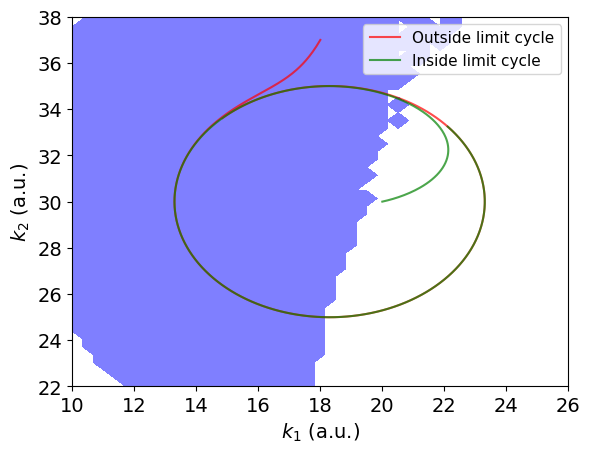

<Figure size 4000x3000 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.size'] = 14
def simulate_trajectory(init_point, steps, func, kwargs):
    """
    Simulates a trajectory using the provided function.

    Parameters:
        init_point (tuple): Starting point (k1, k2).
        steps (int): Number of time steps to simulate.
        func (callable): Function that returns (f1, f2) for a given (k1, k2).
        kwargs (dict): Additional arguments passed to the function.

    Returns:
        dict: {'k1': list of k1 values, 'k2': list of k2 values}
    """
    k1_vals = [init_point[0]]
    k2_vals = [init_point[1]]

    for _ in range(steps):
        k1, k2 = k1_vals[-1], k2_vals[-1]
        f1, f2 = func(k1, k2, **kwargs)
        k1_new = k1 + f1
        k2_new = k2 + f2
        k1_vals.append(k1_new)
        k2_vals.append(k2_new)

    return {'k1': np.array(k1_vals), 'k2': np.array(k2_vals)}


# Define the parameter ranges (for Turing region and plotting)
k1_vals = np.linspace(10, 30, 25)
k2_vals = np.linspace(20, 40, 25)

# Reconstruct coordinate grid for visualization
K1, K2 = np.meshgrid(k1_vals, k2_vals)

# Turing region (assuming you have X, Y, Turing_region precomputed)
# X, Y, Turing_region = compute_turing_region(...)

# Simulate trajectory starting **outside** the LC
res_out = simulate_trajectory(
    init_point=(18, 37),  # example: far from the limit cycle
    steps=700,
    func=Net8_cycle,
    kwargs={
        'radius': 5,
        'speed_r': 0.01,
        'speed_theta': 0.01,
        'cent_cyc': (18.3, 30),
        'tangential_noise': 0,
        'radial_noise': 0
    }
)

# Simulate trajectory starting **inside** the LC
res_in = simulate_trajectory(
    init_point=(20, 30),  # near or inside LC center
    steps=700,
    func=Net8_cycle,
    kwargs={
        'radius': 5,
        'speed_r': 0.01,
        'speed_theta': 0.01,
        'cent_cyc': (18.3, 30),
        'tangential_noise': 0,
        'radial_noise': 0
    }
)

# Plot Turing region
plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white", "blue"], alpha=0.5)

# Plot trajectories (as lines or points)
plt.plot(res_out['k1'], res_out['k2'], color='red', label='Outside limit cycle', alpha = 0.7)
plt.plot(res_in['k1'], res_in['k2'], color='green', label='Inside limit cycle', alpha = 0.7)

plt.legend(loc='upper right',fontsize = 11)  # or your preferred location



# Labels and limits
plt.xlabel(r'$k_1$ (a.u.)')
plt.ylabel(r'$k_2$ (a.u.)')
plt.xlim(18-8,18+8)
plt.ylim(30-8,30+8)

#plt.legend()
plt.figure(figsize=(8, 6), dpi=500)
plt.show()
plt.savefig('trajectory_plot.png', dpi=300, bbox_inches='tight')



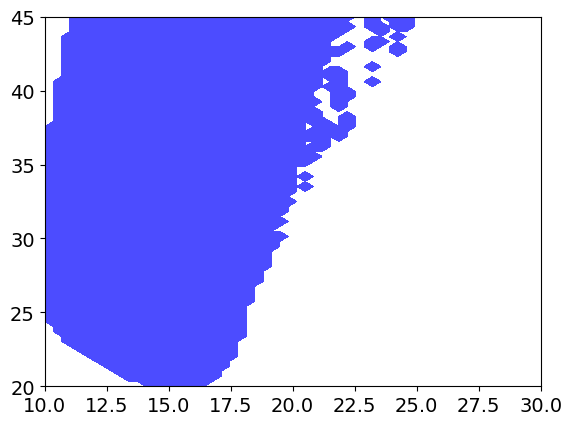

In [36]:
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 

def compute_turing_region(params, xmin, xmax, ymin, ymax, factor):
    xval = np.linspace(xmin, xmax, int((xmax - xmin) * factor))
    yval = np.linspace(ymin, ymax, int((ymax - ymin) * factor))
    X, Y = np.meshgrid(xval, yval)
    Turing_region = np.zeros_like(X)
    b_a, v_a, k_a,a,b, k_ba, mu_a = symbols('b_a v_a k_a a b k_ba mu_a', real=True)
    r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
    b_b, v_b, k_ab,a,b, mu_b = symbols('b_b v_b k_ab a b mu_b', real=True)
    r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
    r_d_a_a = diff(r_d_a, a)
    r_d_a_b = diff(r_d_a, b)

    r_d_b_b = diff(r_d_b, b)
    r_d_b_a = diff(r_d_b, a)
    
    mod_pars = params[2:]
    values_base = {
        b_a: mod_pars[3], v_a: mod_pars[0], k_ba: mod_pars[2], mu_a: mod_pars[5],
        b_b: mod_pars[4], v_b: mod_pars[1], mu_b: mod_pars[6] # Fixed values
    }
    D_a = params[0]
    D_b = params[1]
    
    for i, k_a_val in enumerate(xval):
        for j, k_ab_val in enumerate(yval):
            values = values_base.copy()
            values[k_a] = k_a_val
            values[k_ab] = k_ab_val
            values[a] = solve_ss(k_a_val, k_ab_val, params)[0]
            values[b] = solve_ss(k_a_val, k_ab_val, params)[1]
            J = np.array([
                [r_d_a_a.subs(values).evalf(), r_d_a_b.subs(values).evalf()],
                [r_d_b_a.subs(values).evalf(), r_d_b_b.subs(values).evalf()]
            ], dtype=float)
            real_lambda = []
            Turing_region[j,i] = 0 #For nothing
            k_values = np.linspace(0,2,100)
            for k in k_values:
                J_diff = J - np.diag([D_a * k**2, D_b * k**2])
                eig_vals = np.real(np.linalg.eigvals(J_diff))
                max_real_lambda = np.max(eig_vals)
                real_lambda.append(max_real_lambda)
            lambda_0 = real_lambda[0]
            lambda_max = max(real_lambda)
            index_max = np.argmax(real_lambda)
            # Proper Turing instability
            if lambda_max > 0 and lambda_0 < 0 and index_max != 0:
                Turing_region[j, i] = lambda_max
            else:
                Turing_region[j, i] = 0
    return X, Y, Turing_region


X, Y, Turing_region = compute_turing_region(params, 10, 30, 20,45, 3)
plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white","blue"], alpha=0.7)




In [77]:
hi

NameError: name 'hi' is not defined

In [6]:
b_a, v_a, k_a,a,b, k_ba, mu_a = symbols('b_a v_a k_a a b k_ba mu_a', real=True)
r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
b_b, v_b, k_ab,a,b, mu_b = symbols('b_b v_b k_ab a b mu_b', real=True)
r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
r_d_a_a = diff(r_d_a, a)
r_d_a_b = diff(r_d_a, b)
r_d_b_b = diff(r_d_b, b)
r_d_b_a = diff(r_d_b, a)
index = 200
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 
D_a = params[0]
D_b = params[1] 
turing_enter = []
turing_leave = []
sharp_dec = []
lambda_max = []
values = {
    b_a: mod_pars[3],
    v_a: mod_pars[0],
    k_a: res['k1'][index],#results[index]['k1'],
    a: solve_ss(res['k1'][index],res['k2'][index],params)[0],#solve_ss(results[index]['k1'],results[index]['k2'])[0], 
    b: solve_ss(res['k1'][index],res['k2'][index],params)[1],#solve_ss(results[index]['k1'],results[index]['k2'])[1], 
    k_ba: mod_pars[2],
    mu_a: mod_pars[5],
    b_b: mod_pars[4],
    v_b: mod_pars[1],
    k_ab: res['k2'][index],#results[index]['k2'],
    mu_b: mod_pars[6]
}
rdaa_numeric = r_d_a_a.subs(values).evalf()
rdab_numeric = r_d_a_b.subs(values).evalf()
rdba_numeric = r_d_b_a.subs(values).evalf()
rdbb_numeric = r_d_b_b.subs(values).evalf()

J = np.array([[rdaa_numeric,rdab_numeric], [rdba_numeric, rdbb_numeric]])
J = np.array(J, dtype=float)
eig_val = np.linalg.eig(J)[0]
D_a = params[0]
D_b = params[1] 
k_values = np.linspace(0, 2, 200)
real_lambda = []
prev_eig_vals = [None, None]
for k in k_values:
    J_diff = J - np.diag([D_a * k**2, D_b * k**2])
    eig_vals = np.real(np.linalg.eigvals(J_diff))
    max_real_lambda = np.max(eig_vals)
    real_lambda.append(max_real_lambda)
plt.plot(k_values,real_lambda)
plt.axhline(0)
plt.ylim(-3,1)
print(max(real_lambda))
print(real_lambda.index(max(real_lambda))/100)

NameError: name 'res' is not defined

In [7]:
plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf ], colors=["white","blue"], alpha=0.7)
def circle(center, radius):
    theta = np.linspace(0, 2 * np.pi, 100)
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    return x,y
x,y = circle([25,30],8)
plt.plot(x,y, color  = 'green')
i = 28
plt.scatter(x[i],y[i], color = 'yellow')
print(x[i],y[i])


NameError: name 'X' is not defined

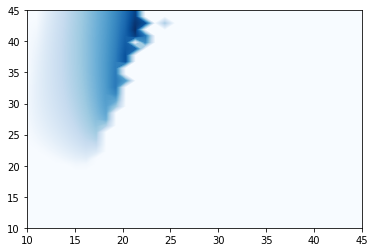

In [93]:
plt.contourf(X, Y, Turing_region, levels=1000, cmap='Blues')

9.999999999990033
4.786021847301444 5.619149238363478
0.8331273910620336
5.241561054733285
[5.29107484 1.96128333]


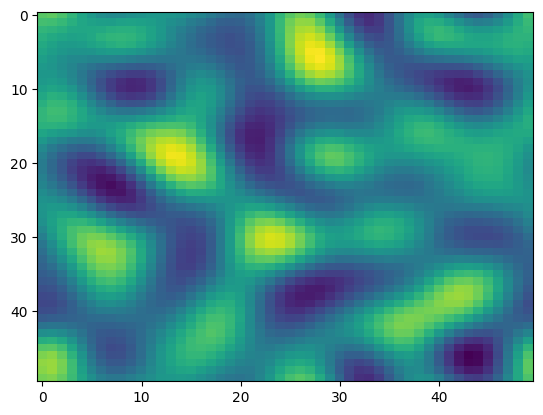

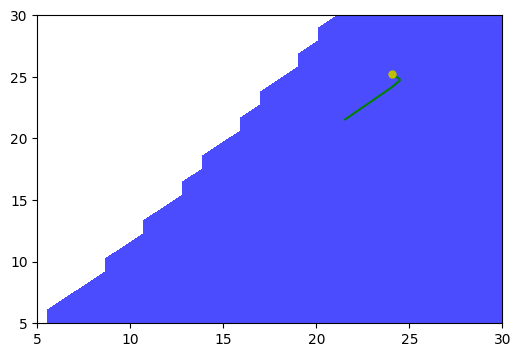

In [ ]:
index = 
plt.imshow(np.reshape(results[index]['u'],(50,50)), aspect='auto')
print(results[index]['t'])
plt.figure(figsize=(6, 4))
plt.plot(k1_values[:index],k2_values[:index], color = 'green')
plt.plot(k1_values[index],k2_values[index], 'yo', markersize=5)
plt.xlim(5,30)
plt.ylim(5,30)
plt.contourf(X, Y, Turing_region, levels=[-0.5, 0.5, 1.5], colors=["white","blue"], alpha=0.7)
print(min(results[index]['u'][0]),max(results[index]['u'][0]))
print(max(results[index]['u'][0])-min(results[index]['u'][0]))
print(np.mean(results[index]['u'][0]))
print(solve_ss(results[index]['k1'],results[index]['k2'],params))


17.361546655478474 26.83041956971823
-0.03100254320307272
0.41


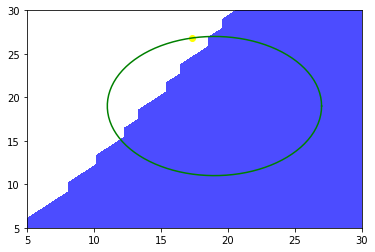

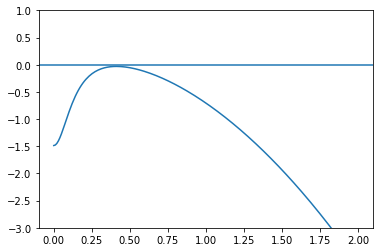

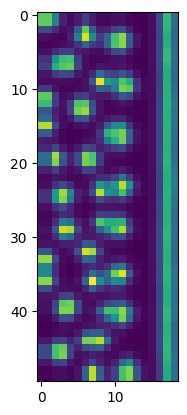

In [22]:
plt.imshow(np.reshape(results['u'][80][:, :16], (50, 16)))

In [53]:
entropy_list = []
xentropy_list = []
yentropy_list = []
ps_list = [] #Power spectrum
results = res2
for i in range(0,len(results['k1'])):
    F = np.fft.fft2(np.reshape(results['u'][i][:, :17], (50, 16)))
    power_spectrum = np.abs(F)**2
    power_spectrum_norm = power_spectrum / np.sum(power_spectrum)
    entropy_list.append(-np.sum(power_spectrum_norm * np.log2(power_spectrum_norm+ 0.00000000000000001)))
    xpower_spectrum = power_spectrum[0,:]
    ypower_spectrum = power_spectrum[:,0]
    xpower_spectrum_norm = xpower_spectrum / np.sum(xpower_spectrum)
    ypower_spectrum_norm = ypower_spectrum / np.sum(ypower_spectrum)
    xentropy_list.append(-np.sum(xpower_spectrum_norm * np.log2(xpower_spectrum_norm+ 0.00000000000000001)))
    yentropy_list.append(-np.sum(ypower_spectrum_norm * np.log2(ypower_spectrum_norm+ 0.00000000000000001)))
    print(i)
p = np.linspace(0,len(results),len(results))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

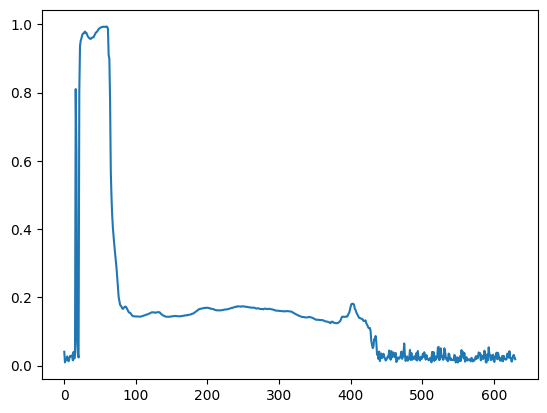

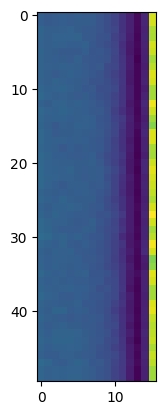

In [56]:

plt.plot(np.divide(xentropy_list,entropy_list)) # But... Not pixel by pixel. The pattern may shift but produce same value...
plt.figure()
plt.imshow(results['u'][50][:, :16])

(0.0, 2.0)

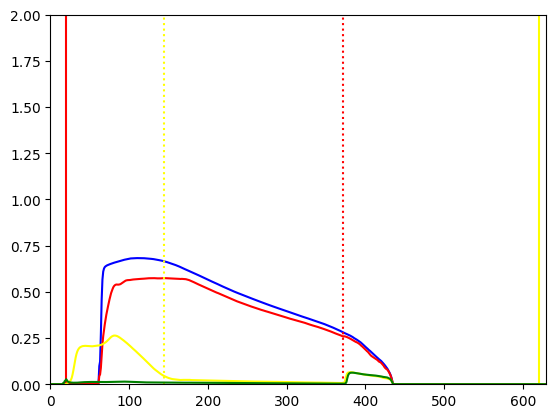

In [83]:
x = np.linspace(0,630,631)
top = 2
bottom =0
#- means entrance to TI and : means exit
plt.plot(navg_res_sd1,'blue')
plt.plot(avg_res_sd1,'red')
plt.axvline(20,color = 'red', linestyle='-') #20- , 8-, 10-, 30-
plt.axvline(372,color = 'red', linestyle=':') #372:, 522:, 393:, 232: 

plt.plot(avg_res_sd2,'yellow')
plt.axvline(144,color = 'yellow', linestyle=':') #144:, 67- , 17-,19-
plt.axvline(621,color = 'yellow', linestyle='-') # 621-, 480:, 403:,263: 

plt.plot(avg_res_sd3,'green')
#plt.axvline(85,color = 'green', linestyle=':') # None, 194-,  240: 85:
#plt.axvline(618,color = 'green', linestyle='-') #None, 423:,  290-, 618-
#plt.axvline(431,color = 'green', linestyle=':') # None, None, 431:, None
#plt.axvline(616,color = 'green', linestyle='-') #None, None, 616-, None
plt.xlim(0,630)
plt.ylim(0,2)

In [120]:
res1['k1'][200],res2['k2'][ind]

(np.float64(13.44783922030473), np.float64(30.984286383637816))

13.44783922030473 30.984286383637816
0.4353277399822275
1.35


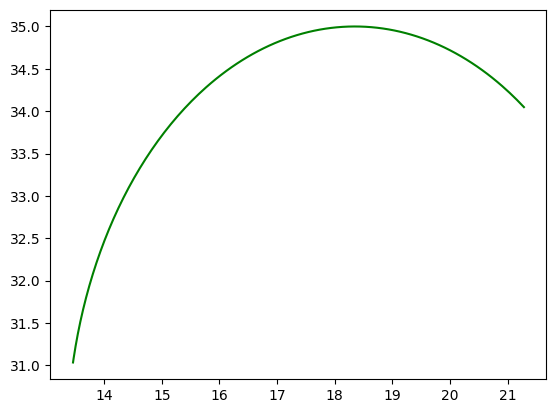

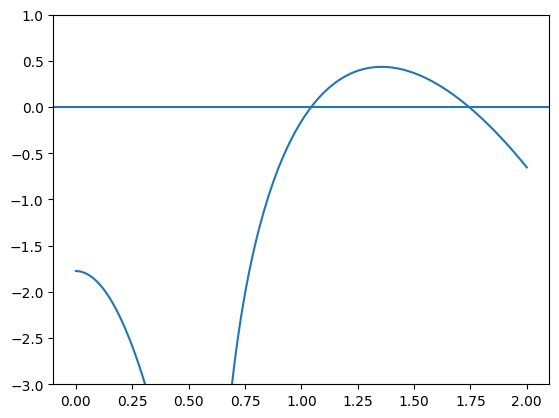

In [8]:
ind = 200
print(res1['k1'][ind],res2['k2'][ind])
plt.plot(res1['k1'][:ind],res2['k2'][:ind],'green')
# plt.contourf(X, Y, Turing_region, levels=[-np.inf, 0, np.inf], colors=["white", colors["base"]], alpha=0.3)

# # Plot for b_A + 0.5
# plt.contourf(X, Y, Turing_region1, levels=[-np.inf, 0, np.inf], colors=["white", colors["bA+0.5"]], alpha=0.3)

# # Plot for b_A + 1
# plt.contourf(X, Y, Turing_region2, levels=[-np.inf, 0, np.inf], colors=["white", colors["bA+1"]], alpha=0.3)
plt.figure()
b_a, v_a, k_a,a,b, k_ba, mu_a = symbols('b_a v_a k_a a b k_ba mu_a', real=True)
r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
b_b, v_b, k_ab,a,b, mu_b = symbols('b_b v_b k_ab a b mu_b', real=True)
r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
r_d_a_a = diff(r_d_a, a)
r_d_a_b = diff(r_d_a, b)

r_d_b_b = diff(r_d_b, b)
r_d_b_a = diff(r_d_b, a)

params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 
D_a = params[0]
D_b = params[1] 
turing_enter = []
turing_leave = []
sharp_dec = []
lambda_max = []
values = {
    b_a: mod_pars[3],
    v_a: mod_pars[0],
    k_a: res1['k1'][ind],
    a: solve_ss(res1['k1'][ind], res1['k2'][ind],params)[0], 
    b: solve_ss(res1['k1'][ind], res1['k2'][ind],params)[1],
    k_ba: mod_pars[2],
    mu_a: mod_pars[5],
    b_b: mod_pars[4],
    v_b: mod_pars[1],
    k_ab: res1['k2'][ind],
    mu_b: mod_pars[6]
}
rdaa_numeric = r_d_a_a.subs(values).evalf()
rdab_numeric = r_d_a_b.subs(values).evalf()
rdba_numeric = r_d_b_a.subs(values).evalf()
rdbb_numeric = r_d_b_b.subs(values).evalf()

J = np.array([[rdaa_numeric,rdab_numeric], [rdba_numeric, rdbb_numeric]])
J = np.array(J, dtype=float)
eig_val = np.linalg.eig(J)[0]
D_a = params[0]
D_b = params[1] 
k_values = np.linspace(0, 2, 200)
real_lambda = []
prev_eig_vals = [None, None]
for k in k_values:
    J_diff = J - np.diag([D_a * k**2, D_b * k**2])
    eig_vals = np.real(np.linalg.eigvals(J_diff))
    max_real_lambda = np.max(eig_vals)
    real_lambda.append(max_real_lambda)
plt.plot(k_values,real_lambda)
plt.axhline(0)
plt.ylim(-3,1)
print(max(real_lambda))
print(real_lambda.index(max(real_lambda))/100)

In [89]:
b_a, v_a, k_a,a,b, k_ba, mu_a = symbols('b_a v_a k_a a b k_ba mu_a', real=True)
r_d_a = b_a + v_a * 1 / (1 + (k_a / a) ** 2) * 1 / (1 + (b / k_ba) ** 2) - mu_a * a
b_b, v_b, k_ab,a,b, mu_b = symbols('b_b v_b k_ab a b mu_b', real=True)
r_d_b = b_b + v_b * 1 / (1 + (k_ab / a) ** 2) - mu_b * b
r_d_a_a = diff(r_d_a, a)
r_d_a_b = diff(r_d_a, b)
ind = 200
r_d_b_b = diff(r_d_b, b)
r_d_b_a = diff(r_d_b, a)

D_a = params[0]
D_b = params[1] 
results = []
from scipy.interpolate import interp1d

# Settings
step_size = 0.01
max_steps = 300
target_lambdas = [1.5, 1.25, 1.0, 0.75, 0.5, 0.25, 0.0,-0.25,-0.5,-0.75, -1.0,-1.25,-1.50]

# Get k1 and k2 values at the index
k1_value = res1['k1'][ind]
k2_value = res2['k2'][ind]

# Scan b_A and record max_real_lambda
results = []
initial_b_A = 0

for step in range(max_steps):
    params2 = params
    params2[5] = initial_b_A + step * step_size
    current_b_A =initial_b_A + step * step_size
    values = {
        b_a: current_b_A,
        v_a: mod_pars[0],
        k_a: k1_value,
        a: solve_ss(k1_value, k2_value, params2)[0], 
        b: solve_ss(k1_value, k2_value, params2)[1],
        k_ba: mod_pars[2],
        mu_a: mod_pars[5],
        b_b: mod_pars[4],
        v_b: mod_pars[1],
        k_ab: k2_value,
        mu_b: mod_pars[6]
    }

    # Jacobian
    rdaa_numeric = r_d_a_a.subs(values).evalf()
    rdab_numeric = r_d_a_b.subs(values).evalf()
    rdba_numeric = r_d_b_a.subs(values).evalf()
    rdbb_numeric = r_d_b_b.subs(values).evalf()

    J = np.array([[rdaa_numeric, rdab_numeric], [rdba_numeric, rdbb_numeric]], dtype=float)

    # Max real(lambda)
    k_values = np.linspace(0, 2, 200)
    real_lambda = []
    for k in k_values:
        J_diff = J - np.diag([D_a * k**2, D_b * k**2])
        eig_vals = np.real(np.linalg.eigvals(J_diff))
        real_lambda.append(np.max(eig_vals))

    max_lambda = max(real_lambda)
    results.append((current_b_A, max_lambda))

# Convert to arrays for interpolation
b_A_vals = np.array([r[0] for r in results])
lambda_vals = np.array([r[1] for r in results])


# Interpolation function
interp_func = interp1d(lambda_vals, b_A_vals, bounds_error=False, fill_value='extrapolate')

# Find b_A values for target lambdas
print("Target λ\tEstimated b_A")
est_b_A_list = []
for target in target_lambdas:
    est_b_A = interp_func(target)
    print(f"{target:.2f}\t\t{est_b_A:.4f}")
    est_b_A_list.append(est_b_A)




Target λ	Estimated b_A
1.50		0.2120
1.25		0.3867
1.00		0.5675
0.75		0.7548
0.50		0.9487
0.25		1.1497
0.00		1.3580
-0.25		1.5740
-0.50		1.7984
-0.75		2.0314
-1.00		2.2736
-1.25		2.5258
-1.50		2.7886


(0.0, 2.0)

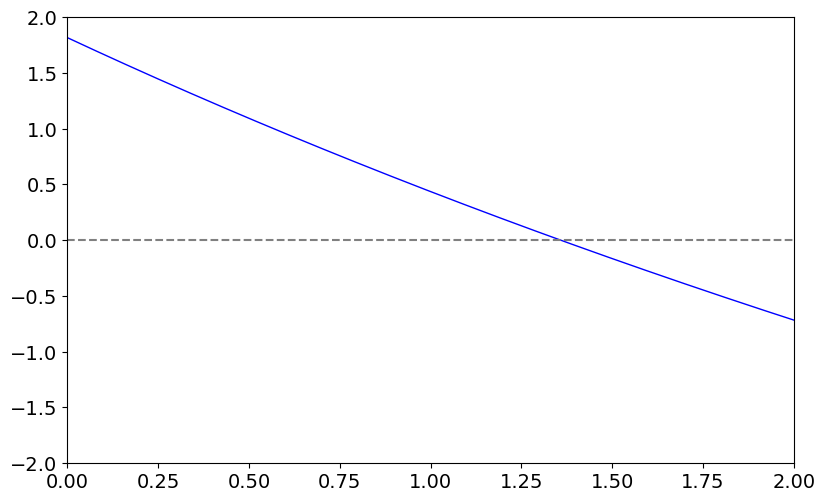

In [90]:
plt.figure(figsize=(8, 5))
plt.plot(b_A_vals, lambda_vals, label='max Real(λ)', color='blue', linewidth=1)


# Horizontal line at λ=0 (instability threshold)
plt.axhline(0, color='gray', linestyle='--', label='λ = 0')
plt.tight_layout()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(-2,2)
plt.xlim(0,2)

In [95]:
r, v_r, v_theta = 5, 0.1, 0.01 # 8, 0.3, 0.006
matrix = np.zeros((50, 50), dtype=float)

res1 = np.load(f"FF_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(18.35, 30)_3.npz")
res2 = np.load(f"FF_630_noise_amp0.01_v_theta0.01_0_0.5_1_cent_cyc(18.35, 30)_2.npz")
first_mat = 0
second_mat = 0.5
third_mat = 1
matrix[:, :17] = first_mat
matrix[:, 17:34] = second_mat
matrix[:, 34:] = third_mat
FF_datas = matrix
print(FF_datas)


FF_datas = matrix
print(FF_datas)
ind= 200

bound_cond = "Neumann"
nx = 50
ny = 50

model_eq = [Net8_pat, Net8_cycle] 

# Set parameters for Turing
# params = [
#     1,
#     1000, 
#     1000, # v_a, 
#     1000,# v_b, 
#     0.464158883361278,# k_ba, 
#     0.0100000000000000,#  b_a, 
#     0.0100000000000000,# b_b, 
#     0.464158883361278,# mu_a, 
#     21.5443469003188,# mu_b
# ]
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 
mod_pars = params[2:]
dx = 1
factor = 1 
y0 = np.zeros(2 * nx * ny + 2)
# resf = simulate_two_step_euler_maruyama_with_storage(
#         y0=y0.copy(),
#         t0=0,
#         t_max=200,
#         dt=0.002,
#         c=params,
#         dx=1,
#         bound_cond=bound_cond,
#         modelfuns=model_eq,
#         r=r,
#         noise_amp=0.1,
#         v_r=0,
#         v_theta=0,
#         cent_cyc=[0,0],
#         k1_0 = res1['k1'][ind],
#         k2_0 = res1['k2'][ind],
#         tangential_noise = 0, 
#         radial_noise = 0,
#         FF_data = FF_datas
# )


[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]
[[0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 ...
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]
 [0. 0. 0. ... 1. 1. 1.]]


In [ ]:
index = 199
resfp = plt.imshow(resf[index]['u'],vmin=0,vmax = 3)
plt.colorbar(resfp)
print(resf[index]['k1'],resf[index]['k2'])


In [100]:
params = [
    1,       # D_A: activator diffusion
    25,      # D_B: inhibitor diffusion (moderately faster than D_A)
    3500,     # V_A: 
    3500,    # V_B: 
    0.5,     # k_BA: 
    1,    # b_A: 
    1,    # b_B: 
    6,     # μ_A: 
    8       # μ_B: 
] 

In [ ]:
import numpy as np
from joblib import Parallel, delayed
import os

# --- Parameters ---
#conts = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75,2]
conts = [-1,-0.75, -0.5,-0.25, 0,0.25, 0.5,0.75, 1]
noises = [0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
param_pairs = [(n, c) for n in noises for c in conts]
num_repeats = 8
t_max = 200  # used for filenames
bound_cond = "absorbing"

# --- Create output folder ---

# --- Define simulation function ---
def run_simulation(noise_amp, cont):
    matrix = np.zeros((50, 50), dtype=float)
    matrix[:, :25] = 0
    matrix[:, 25:] = cont # ensure full half of matrix gets "cont"
    FF_datas = matrix

    # Your simulation function call
    return simulate_two_step_euler_maruyama_with_storage(
        y0=y0.copy(),
        t0=0,
        t_max=t_max,
        dt=0.002,
        c=params,
        dx=1,
        bound_cond=bound_cond,
        modelfuns=model_eq,
        r=r,
        noise_amp=noise_amp,
        v_r=0,
        v_theta=0,
        cent_cyc=[0, 0],
        k1_0=13.44783922030473,
        k2_0=30.984286383637816,
        tangential_noise=0,
        radial_noise=0,
        FF_data=FF_datas
    )

# --- Define task structure ---
tasks = [(noise_amp, cont, repeat_i)
         for noise_amp, cont in param_pairs
         for repeat_i in range(num_repeats)]

# --- Task runner wrapper ---
def run_task(task):
    noise_amp, cont, repeat_i = task
    result = run_simulation(noise_amp, cont)
    return (noise_amp, cont, repeat_i, result)

# --- Run all tasks in parallel ---
results_all = Parallel(n_jobs=8)(
    delayed(run_task)(task) for task in tasks
)

# --- Process and save results ---
for noise_amp, cont in param_pairs:
    results_for_pair = [
        result_dict_list for (n, c, rep, result_dict_list) in results_all
        if n == noise_amp and c == cont
    ]

    k1_values = [[tp['k1'] for tp in repeat] for repeat in results_for_pair]
    k2_values = [[tp['k2'] for tp in repeat] for repeat in results_for_pair]
    u_values  = [[tp['u']  for tp in repeat] for repeat in results_for_pair]
    v_values  = [[tp['v']  for tp in repeat] for repeat in results_for_pair]
    t_values  = [[tp['t']  for tp in repeat] for repeat in results_for_pair]

    filename = f"FF_heatnt/FF_heatmap_bound_r_{t_max}_noise{noise_amp}_cont{cont}_repeats{num_repeats}.npz"
    np.savez(filename, k1=k1_values, k2=k2_values, u=u_values, v=v_values, t=t_values)



In [68]:
print(conts)

[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1]


In [84]:

avg_msd_FF = {n: []for n in noises} #ITS SD....!
Tavg_msd_FF = {n: []for n in noises}



for k in noises:
    for j in conts:
        finimg = []
        for i in range(0,8):
            ffres = np.load(f'FF_heatnt/FF_heatmap_bound_r_200_noise{k}_cont{j}_repeats8.npz')
            finimg.append(ffres['u'][i][-1])
        stacked = np.stack(finimg, axis=0)  # Shape: (8, 50, 50)
        mean_stack = np.mean(stacked, axis=0)
        std_stack = np.std(stacked, axis=0)
        std_1 = np.mean(std_stack[:, :25], axis=0)  # average over left half columns
        std_2 = np.mean(std_stack[:, 25:], axis=0)  # average over right half columns
        avg_msd_FF[k].append(np.mean(std_1))   # Now this is std, not msd
        Tavg_msd_FF[k].append(np.mean(std_2))


In [86]:
avg_SEF_FF = {n: []for n in noises}
Tavg_SEF_FF = {n: []for n in noises}
xavg_SEF_FF = {n: []for n in noises}
xTavg_SEF_FF = {n: []for n in noises}
for k in noises:
    for j in conts:
        finent = []
        xent = []
        finent2 = []
        xent2 = []
        for i in range(0,8):
            ffres = np.load(f'FF_heatnt/FF_heatmap_200_noise{k}_cont{j}_repeats8.npz')
            F = np.fft.fft2(np.reshape(ffres['u'][i][-1][:, :25], (50, 25)))
            power_spectrum = np.abs(F)**2
            power_spectrum_norm = power_spectrum / np.sum(power_spectrum)
            finent.append(-np.sum(power_spectrum_norm * np.log2(power_spectrum_norm+ 0.00000000000000001)))
            xpower_spectrum = power_spectrum[0,:]
            xpower_spectrum_norm = xpower_spectrum / np.sum(xpower_spectrum)
            xent.append(-np.sum(xpower_spectrum_norm * np.log2(xpower_spectrum_norm+ 0.00000000000000001)))
            
            F2 = np.fft.fft2(np.reshape(ffres['u'][i][-1][:, 25:], (50, 25)))
            power_spectrum2 = np.abs(F2)**2
            power_spectrum_norm2 = power_spectrum2 / np.sum(power_spectrum2)
            finent2.append(-np.sum(power_spectrum_norm2 * np.log2(power_spectrum_norm2+ 0.00000000000000001)))
            x2power_spectrum = power_spectrum2[0,:]
            x2power_spectrum_norm = x2power_spectrum / np.sum(x2power_spectrum)
            xent2.append(-np.sum(x2power_spectrum_norm * np.log2(x2power_spectrum_norm+ 0.00000000000000001)))
            
        avg_SEF_FF[k].append(np.mean(finent))
        Tavg_SEF_FF[k].append(np.mean(finent2))
        xavg_SEF_FF[k].append(np.mean(np.divide(xent,finent)))
        xTavg_SEF_FF[k].append(np.mean(np.divide(xent2,finent2)))


7
(7, 9)


<Figure size 1000x800 with 0 Axes>

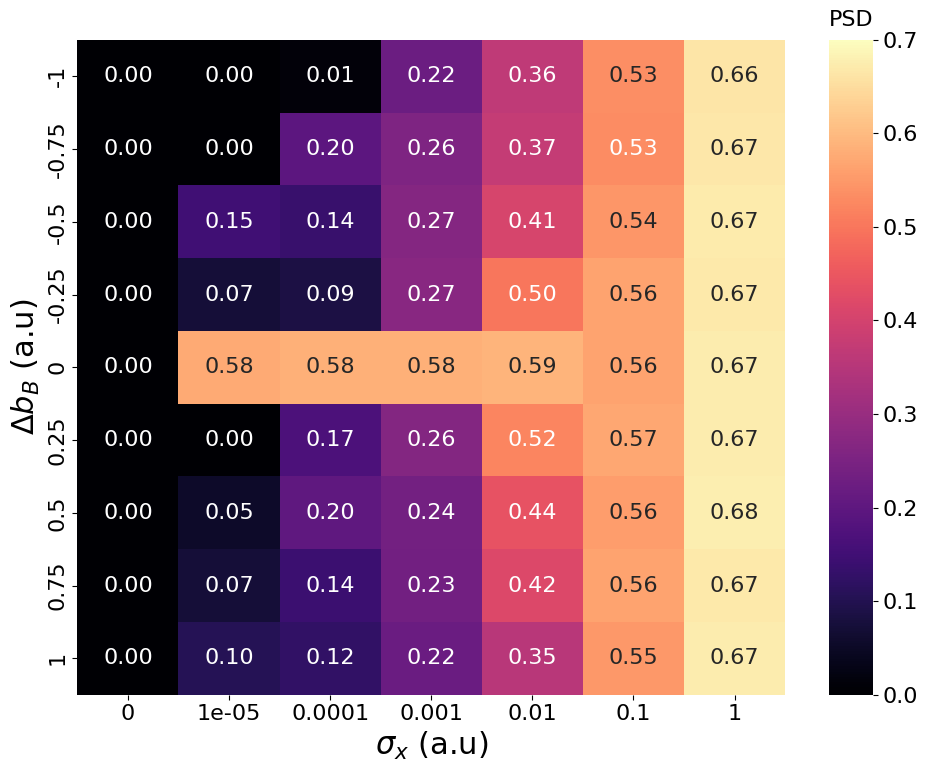

In [78]:
import seaborn as sns
fon = 16
import matplotlib as mpl
mpl.rcParams['font.size'] = fon
heatmap_data = np.zeros((len(noises), len(conts)))
print(len(noises))
print(heatmap_data.shape)

plt.figure(figsize=(10, 8))
for i in range(len(noises)):
    for j in range(len(conts)):
        heatmap_data[i,j] = avg_msd_FF[noises[i]][j]


heatmap_data = heatmap_data.T

# Plotting the heatmap with swapped axes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    xticklabels=noises,  # now x-axis is 'noises'
    yticklabels=conts,   # now y-axis is 'conts'
    cmap="viridis",vmin=0,  #magma
    vmax=0.7,
    cbar_kws={"aspect": 15}
)
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.set_title('PSD', fontsize=fon, pad=10)

# Plotting the heatmap

plt.xlabel(r'$\sigma_{x}$ (a.u)',fontsize = 22)
plt.ylabel(r'$\Delta b_{B}$ (a.u)',fontsize = 22)




# ⚠️ DO NOT invert the Y-axis
plt.gca().invert_yaxis()  # <- remove or comment this out

plt.tight_layout()
plt.show()



7
(7, 9)


<Figure size 1000x800 with 0 Axes>

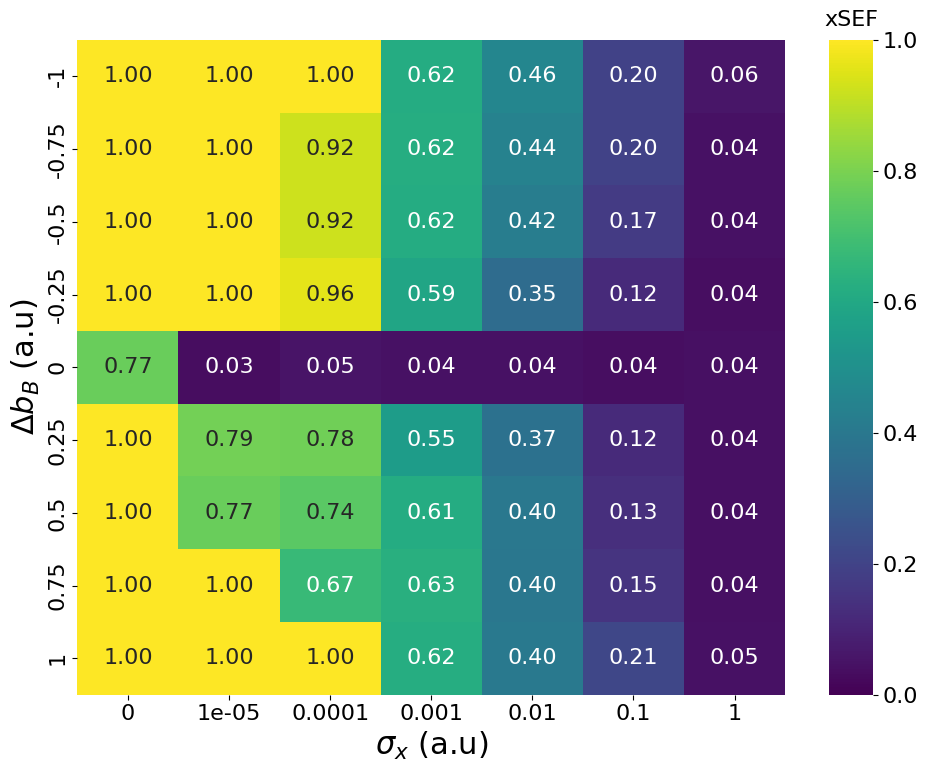

In [87]:
import seaborn as sns
fon = 16
import matplotlib as mpl
mpl.rcParams['font.size'] = fon
heatmap_data = np.zeros((len(noises), len(conts)))
print(len(noises))
print(heatmap_data.shape)

plt.figure(figsize=(10, 8))
for i in range(len(noises)):
    for j in range(len(conts)):
        heatmap_data[i,j] = xavg_SEF_FF[noises[i]][j]


heatmap_data = heatmap_data.T

# Plotting the heatmap with swapped axes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    xticklabels=noises,  # now x-axis is 'noises'
    yticklabels=conts,   # now y-axis is 'conts'
    cmap="viridis",vmin=0, 
    vmax=1,
    cbar_kws={"aspect": 15}
)
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.set_title('xSEF', fontsize=fon, pad=10)

# Plotting the heatmap

plt.xlabel(r'$\sigma_{x}$ (a.u)',fontsize = 22)
plt.ylabel(r'$\Delta b_{B}$ (a.u)',fontsize = 22)




# ⚠️ DO NOT invert the Y-axis
plt.gca().invert_yaxis()  # <- remove or comment this out

plt.tight_layout()
plt.show()


7
(7, 9)


<Figure size 1000x800 with 0 Axes>

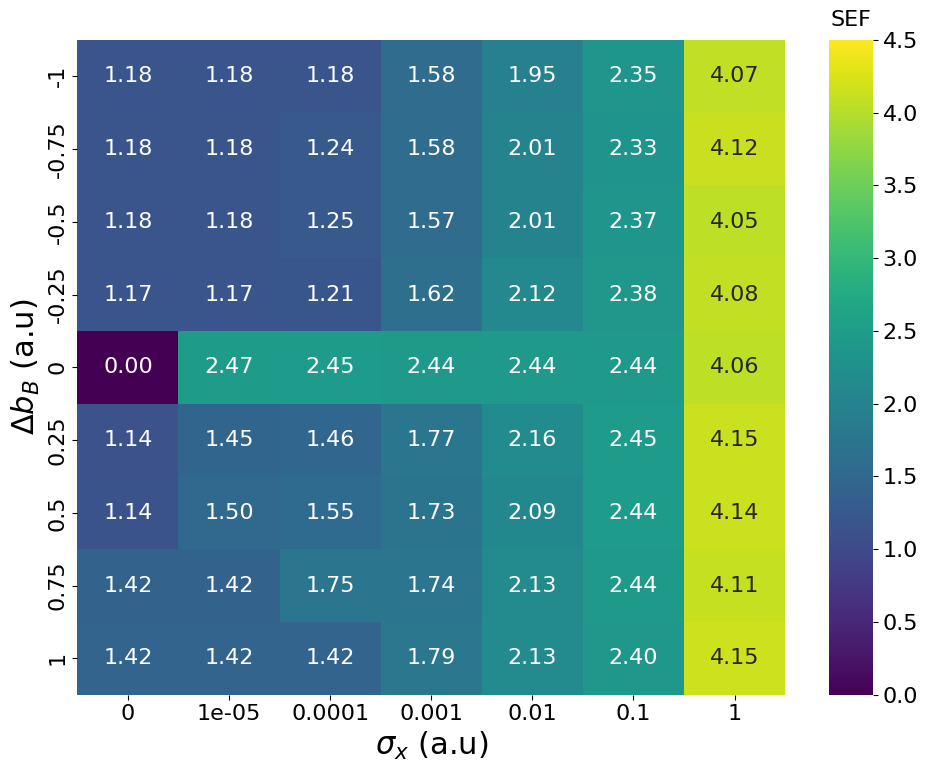

In [88]:
import seaborn as sns
fon = 16
import matplotlib as mpl
mpl.rcParams['font.size'] = fon
heatmap_data = np.zeros((len(noises), len(conts)))
print(len(noises))
print(heatmap_data.shape)

plt.figure(figsize=(10, 8))
for i in range(len(noises)):
    for j in range(len(conts)):
        heatmap_data[i,j] =avg_SEF_FF[noises[i]][j]


heatmap_data = heatmap_data.T

# Plotting the heatmap with swapped axes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    xticklabels=noises,  # now x-axis is 'noises'
    yticklabels=conts,   # now y-axis is 'conts'
    cmap="viridis",vmin=0, 
    vmax =4.5,
    cbar_kws={"aspect": 15}
)
ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.set_title('SEF', fontsize=fon, pad=10)

# Plotting the heatmap

plt.xlabel(r'$\sigma_{x}$ (a.u)',fontsize = 22)
plt.ylabel(r'$\Delta b_{B}$ (a.u)',fontsize = 22)




# ⚠️ DO NOT invert the Y-axis
plt.gca().invert_yaxis()  # <- remove or comment this out

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
ffres = np.load(f'FF_heatnt/FF_heatmap_100_noise{0}_cont{1}_repeats8.npz')
plt.imshow(ffres['u'][1][-1])
plt.colorbar(label='Concentration')


7
(7, 9)


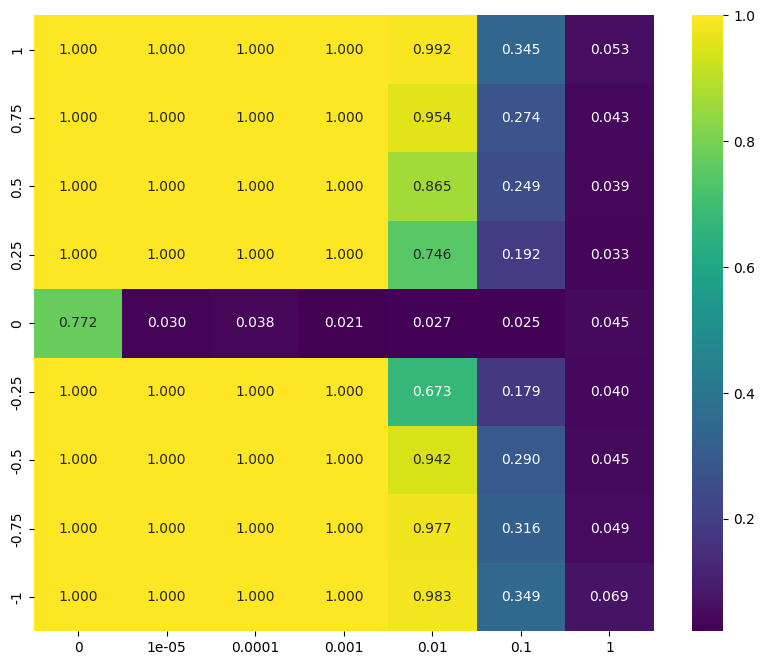

In [33]:
import seaborn as sns
heatmap_data = np.zeros((len(noises), len(conts)))
print(len(noises))
print(heatmap_data.shape)
for i in range(len(noises)):
    for j in range(len(conts)):
        heatmap_data[i,j] = xavg_SEF_FF[noises[i]][j]


heatmap_data = heatmap_data.T

# Plotting the heatmap with swapped axes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    xticklabels=noises,  # now x-axis is 'noises'
    yticklabels=conts,   # now y-axis is 'conts'
    cmap="viridis"
)
ax.invert_yaxis()


7
(7, 9)


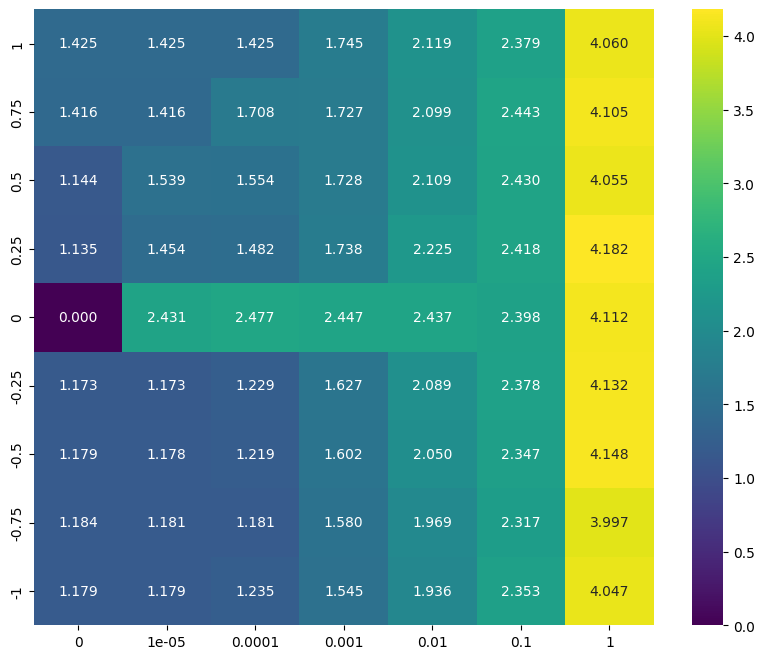

In [38]:
import seaborn as sns
heatmap_data = np.zeros((len(noises), len(conts)))
print(len(noises))
print(heatmap_data.shape)
for i in range(len(noises)):
    for j in range(len(conts)):
        heatmap_data[i,j] = avg_SEF_FF[noises[i]][j]

# Plotting the heatmap

heatmap_data = heatmap_data.T

# Plotting the heatmap with swapped axes
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".3f",
    xticklabels=noises,  # now x-axis is 'noises'
    yticklabels=conts,   # now y-axis is 'conts'
    cmap="viridis"
)
ax.invert_yaxis()
